# Which COVID-19 Vaccine is Best for You?
## DS4A Team 55 Preliminary EDA


In [5]:
import pandas as pd
import numpy as np
import math
import base64
import matplotlib.pyplot as plt
import seaborn as sns
from sodapy import Socrata
import zipfile
import statsmodels.formula.api as sm

In [6]:
# increase the size and quality of any plots we produce
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 300

## state_vax.csv
Vaccine administration data for states within the U.S., including the District of Columbia from 12/13/2020 to the present, updated daily. 

In [7]:
client = Socrata(
        domain = "data.cdc.gov",
        app_token = "bsYMLkKAQhIIVd7wzBzp5BiCR",
        timeout=10
        )
results = client.get_all("unsk-b7fc")

# convert to pandas DataFrame
df = pd.DataFrame.from_records(results)
df.sample(10)

,date,mmwr_week,location,distributed,distributed_janssen,distributed_moderna,distributed_pfizer,distributed_unk_manuf,dist_per_100k,distributed_per_100k_12plus,...,administered_dose1_recip_5pluspop_pct,series_complete_5plus,series_complete_5pluspop_pct,administered_5plus,admin_per_100k_5plus,distributed_per_100k_5plus,series_complete_moderna_5plus,series_complete_pfizer_5plus,series_complete_janssen_5plus,series_complete_unk_manuf_5plus
18009,2021-06-11T00:00:00.000,23,UT,3164630,172400,1353060,1639170,0,98711,122080,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
25764,2021-02-12T00:00:00.000,6,TN,1331775,0,0,0,0,19501,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
17077,2021-06-26T00:00:00.000,25,GU,215770,19500,74200,122070,0,130164,152421,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
19746,2021-05-15T00:00:00.000,19,KS,2888985,162700,1276460,1449825,0,99165,117836,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
19106,2021-05-25T00:00:00.000,21,MS,2572375,161200,1138020,1273155,0,86433,102021,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
16425,2021-07-06T00:00:00.000,27,GA,11223555,599200,4772600,5851755,0,105709,124871,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
19413,2021-05-21T00:00:00.000,20,NJ,10652665,588500,4391420,5672745,0,119933,139829,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
19954,2021-05-12T00:00:00.000,19,PR,3541790,189200,1555860,1796730,0,110899,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
13031,2021-08-27T00:00:00.000,34,AR,3679330,178900,1645080,1855350,0,121921,143878,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
9154,2021-10-25T00:00:00.000,43,KS,4148765,210200,1672440,2266125,0,142407,169220,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [8]:
df.columns

Index(['date', 'mmwr_week', 'location', 'distributed', 'distributed_janssen',
       'distributed_moderna', 'distributed_pfizer', 'distributed_unk_manuf',
       'dist_per_100k', 'distributed_per_100k_12plus',
       'distributed_per_100k_18plus', 'distributed_per_100k_65plus',
       'administered', 'administered_12plus', 'administered_18plus',
       'administered_65plus', 'administered_janssen', 'administered_moderna',
       'administered_pfizer', 'administered_unk_manuf', 'admin_per_100k',
       'admin_per_100k_12plus', 'admin_per_100k_18plus',
       'admin_per_100k_65plus', 'recip_administered',
       'administered_dose1_recip', 'administered_dose1_pop_pct',
       'administered_dose1_recip_1', 'administered_dose1_recip_2',
       'administered_dose1_recip_3', 'administered_dose1_recip_4',
       'administered_dose1_recip_5', 'administered_dose1_recip_6',
       'series_complete_yes', 'series_complete_pop_pct',
       'series_complete_12plus', 'series_complete_12pluspop',
    

In [9]:
df.sort_values(by="date", ascending=True)

,date,mmwr_week,location,distributed,distributed_janssen,distributed_moderna,distributed_pfizer,distributed_unk_manuf,dist_per_100k,distributed_per_100k_12plus,...,administered_dose1_recip_5pluspop_pct,series_complete_5plus,series_complete_5pluspop_pct,administered_5plus,admin_per_100k_5plus,distributed_per_100k_5plus,series_complete_moderna_5plus,series_complete_pfizer_5plus,series_complete_janssen_5plus,series_complete_unk_manuf_5plus
29655,2020-12-13T00:00:00.000,51,VI,975,0,0,0,0,931,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
29650,2020-12-13T00:00:00.000,51,AS,3900,0,0,0,0,7003,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
29651,2020-12-13T00:00:00.000,51,LTC,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
29654,2020-12-13T00:00:00.000,51,GU,3900,0,0,0,0,2353,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
29653,2020-12-13T00:00:00.000,51,US,13650,0,0,0,0,4,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,2022-03-17T00:00:00.000,11,IN,12788880,597300,4493800,7697780,0,189965,224168,...,65,3658031,57.9,9269482,146811,202552,1245729,2124052,279942,8308
35,2022-03-17T00:00:00.000,11,TN,12381230,507700,4728440,7145090,0,181299,212168,...,65.5,3678171,57.3,9668368,150584,192837,1307724,2125078,233507,11862
34,2022-03-17T00:00:00.000,11,AS,110410,600,23500,86310,0,232972,299076,...,95,39734,92.2,99516,230842,256112,9255,29638,576,265
32,2022-03-17T00:00:00.000,11,OK,7042530,321600,2942880,3778050,0,177978,211791,...,75.1,2228964,60.2,5755999,155507,190265,843939,1242340,142413,272


In [10]:
# df.shape

In [11]:
# remove all distribution cols
# remove "Administered", this is the total for 1st dose and complete series
# remove all 5plus cols, very recently approved and sporadic across states
# remove additional doses for 50plus, age group doesn't show up elsewhere in dataset


df = df.drop(columns= ["mmwr_week","distributed", "distributed_janssen", "distributed_moderna", 
                       "distributed_pfizer", "distributed_unk_manuf", "dist_per_100k","distributed_per_100k_12plus",
                       "distributed_per_100k_18plus", "distributed_per_100k_65plus", "distributed_per_100k_5plus",
                       "administered","administered_dose1_recip_5plus", "recip_administered",
                       "administered_dose1_recip_5pluspop_pct", "series_complete_5plus", "series_complete_5pluspop_pct", 
                       "administered_5plus", "admin_per_100k_5plus", "series_complete_moderna_5plus",
                       "series_complete_pfizer_5plus", "series_complete_janssen_5plus", "series_complete_unk_manuf_5plus",
                       "additional_doses_50plus", "additional_doses_50plus_vax_pct"], axis=1)

In [12]:
# abbreviating column names for readability
# cols in api data are labelled differently than csv directly from data.cdc.gov, values match up so renaming those cols

rename_cols = {"administered_12plus":"admin_12plus",
               "location":"state",
               "administered_18plus":"admin_18plus",
               "administered_65plus":"admin_65plus",
               "administered_janssen":"admin_janssen",
               "administered_moderna":"admin_moderna",
               "administered_pfizer":"admin_pfizer",
               "administered_unk_manuf":"admin_unk",
               "administered_dose1_recip":"admin_dose1",
               "administered_dose1_pop_pct":"admin_dose1_pop_pct",
               "administered_dose1_recip_1":"admin_dose1_12plus",
               "administered_dose1_recip_2":"admin_dose1_12plus_pop_pct",
               "administered_dose1_recip_3":"admin_dose1_18plus",
               "administered_dose1_recip_4":"admin_dose1_18plus_pop_pct",
               "administered_dose1_recip_5":"admin_dose1_65plus",
               "administered_dose1_recip_6":"admin_dose1_65plus_pop_pct",
               "series_complete_yes":"series_complete",
               "series_complete_12pluspop":"series_complete_12plus_pop_pct",
               "series_complete_18pluspop":"series_complete_18plus_pop_pct",
               "series_complete_65pluspop":"series_complete_65plus_pop_pct",
               "series_complete_unk_manuf":"series_complete_unk",
               "series_complete_unk_manuf_1":"series_complete_unk_12plus",
               "series_complete_unk_manuf_2":"series_complete_unk_18plus",
               "series_complete_unk_manuf_3":"series_complete_unk_65plus",
               "series_complete_12pluspop_pct":"series_complete_12plus_pop_pct",
               "series_complete_18pluspop_pct":"series_complete_18plus_pop_pct",
               "series_complete_65pluspop_pct":"series_complete_65plus_pop_pct"
               }
df = df.rename(columns=rename_cols)

In [13]:
# df.columns

In [14]:
# see data types of df
# all types = object, need to change to ints and floats
# df.dtypes

In [15]:
# show cols with NaNs
# cols with NaNs are additional dose cols, after investigating this happens when other additional dose cols are 0
df.columns[df.isnull().any()]

Index(['additional_doses', 'additional_doses_vax_pct',
       'additional_doses_12plus', 'additional_doses_12plus_vax_pct',
       'additional_doses_18plus', 'additional_doses_18plus_vax_pct',
       'additional_doses_65plus', 'additional_doses_65plus_vax_pct',
       'additional_doses_moderna', 'additional_doses_pfizer',
       'additional_doses_janssen', 'additional_doses_unk_manuf'],
      dtype='object')

In [16]:
# replace NaNs with 0 to fill in values
nan_col = ['additional_doses', 'additional_doses_vax_pct', 'additional_doses_12plus',
           'additional_doses_18plus', 'additional_doses_12plus_vax_pct', 'additional_doses_18plus_vax_pct',
           'additional_doses_65plus', 'additional_doses_65plus_vax_pct',
           'additional_doses_moderna', 'additional_doses_pfizer',
           'additional_doses_janssen', 'additional_doses_unk_manuf']
df[nan_col] = df[nan_col].fillna(0)

In [17]:
to_int = ['admin_12plus', 'admin_18plus', 'admin_65plus','admin_janssen',
          'admin_moderna', 'admin_pfizer', 'admin_unk','admin_per_100k',
          'admin_per_100k_12plus', 'admin_per_100k_18plus','admin_per_100k_65plus',
          'admin_dose1', 'admin_dose1_12plus', 'admin_dose1_18plus',
          'admin_dose1_65plus', 'series_complete_12plus', 'series_complete_18plus',
          'series_complete','series_complete_65plus', 'series_complete_janssen', 'series_complete_moderna',
          'series_complete_pfizer','series_complete_unk', 'series_complete_janssen_12plus',
          'series_complete_moderna_12plus', 'series_complete_pfizer_12plus', 'series_complete_unk_12plus',
          'series_complete_janssen_18plus', 'series_complete_moderna_18plus', 'series_complete_pfizer_18plus',
          'series_complete_unk_18plus', 'series_complete_janssen_65plus', 'series_complete_moderna_65plus',
          'series_complete_pfizer_65plus', 'series_complete_unk_65plus', 'additional_doses', 'additional_doses_12plus',
          'additional_doses_18plus', 'additional_doses_65plus', 'additional_doses_moderna',
          'additional_doses_pfizer', 'additional_doses_janssen', 'additional_doses_unk_manuf'
         ]

to_float = ['admin_dose1_pop_pct', 'admin_dose1_12plus_pop_pct', 'admin_dose1_18plus_pop_pct',
            'admin_dose1_65plus_pop_pct', 'series_complete_pop_pct', 'series_complete_12plus_pop_pct',
            'series_complete_12plus_pop_pct', 'series_complete_18plus_pop_pct', 'series_complete_65plus_pop_pct',
            'additional_doses_vax_pct', 'additional_doses_12plus_vax_pct', 'additional_doses_18plus_vax_pct', 'additional_doses_65plus_vax_pct'
           ]

df[to_int] = df[to_int].astype("int")
df[to_float] = df[to_float].astype("float")

In [18]:
# checking that data types hace been converted correctly
# df.dtypes

In [19]:
# removing locations outside of the contential united states as well as united states total

drop_location = ["AS", "BP2", "DD2", "FM", "GU",
                 "IH2", "MH", "MP", "PR", "RP",
                 "US", "VA2", "VI", "LTC"]
df = df[~df["state"].isin(drop_location)]

# checking that location vals = 51, including DC

df.state.nunique()

52

In [20]:
# converting "date" col to datetime
df["date"] = pd.to_datetime(df["date"])

In [21]:
# filter location to New York
df_ny = df.loc[df["state"] == "NY"]

In [22]:
# creating a new df with all values on a daily basis instead of a running total
ny_daily = df_ny.drop(columns="state").set_index("date")
df_ny_daily = ny_daily.diff(periods=-1)
# df_ny_daily.head(50)


In [23]:
# this value appears as an outlier but was manually calculated from raw dataset and is correct
print(df_ny_daily["admin_pfizer"].max())

581745.0


In [24]:
# set index to date to extract rows for the first of each month, aligns with how other datasets are reported
df_ny_m = df_ny.set_index("date")
df_ny_m = df_ny_m.groupby(df_ny_m.index.strftime("%Y-%m")).tail(1)
df_ny_m = df_ny_m.reset_index().sort_values(by="date", ascending=True)
# df_ny_m.head(10)

In [25]:
# first reported date and most recent date for vax data, updated daily
print(df_ny["date"].min())
print(df_ny["date"].max())

2020-12-14 00:00:00
2022-03-17 00:00:00


# covid_cases
Covid cases in NY

In [26]:
# #read data
# covid_df = pd.read_csv("data/covid_cases_4states.csv.zip", compression="zip")
# covid_df.head()

with zipfile.ZipFile("data/covid_cases_4states.csv.zip") as z:
    with z.open("covid_cases_4states.csv") as f:
        covid_df = pd.read_csv(f, low_memory=False)

covid_df.head()
# # open zipped dataset
# with zipfile.ZipFile("test.zip") as z:
#    # open the csv file in the dataset
#    with z.open("test.csv") as f:
       
#       # read the dataset
#       train = pd.read_csv(f)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-10,IL,17,VERMILION,17183.0,18 to 49 years,Female,Missing,Missing,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
1,2021-10,NY,36,CLINTON,36019.0,65+ years,Female,Missing,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
2,2021-10,IL,17,EFFINGHAM,17049.0,18 to 49 years,Female,White,Missing,NaN,0.0,Missing,Missing,Probable Case,Missing,Missing,Missing,Missing,NaN
3,2021-09,IL,17,LEE,17103.0,18 to 49 years,Male,White,Missing,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
4,2020-04,IL,17,DUPAGE,17043.0,18 to 49 years,Male,Missing,Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Missing,No,Unknown,Unknown,NaN


In [27]:
covid_df.columns #column names

Index(['case_month', 'res_state', 'state_fips_code', 'res_county',
       'county_fips_code', 'age_group', 'sex', 'race', 'ethnicity',
       'case_positive_specimen_interval', 'case_onset_interval', 'process',
       'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn',
       'death_yn', 'underlying_conditions_yn'],
      dtype='object')

In [28]:
# covid_df.dtypes

In [29]:
covid_df.shape

(13785863, 19)

In [30]:
#data cleaning
covid_df['case_month'] = pd.to_datetime(covid_df['case_month']) #convert to date

In [31]:
# dropping irrelevant columns
covid_df = covid_df.drop(columns=["case_positive_specimen_interval", "case_onset_interval", "process", "exposure_yn", "current_status"])

In [32]:
# rename cols for readability and uniformify across datasets
covid_rename = {"case_month":"date", "res_state":"state",
               "res_county":"county"}

covid_df = covid_df.rename(columns=covid_rename)

In [33]:
# converting data types 
to_str = ["state", "county", "age_group", "sex", "race", "ethnicity",
          "symptom_status", "hosp_yn", "icu_yn", "death_yn", "underlying_conditions_yn"]
covid_df[to_str] = covid_df[to_str].astype(str)

In [34]:
# show cols with NaNs
covid_df.columns[covid_df.isnull().any()]

Index(['county_fips_code'], dtype='object')

In [35]:
# fill NaNs in county_fips_code with "Not Available"
covid_df["county_fips_code"] = covid_df["county_fips_code"].fillna("Not Available")

# shows all values within the race col
covid_df.race.unique()

# rename nan, Missing, and Unknown to Not Available
rename_covid_nan = {"nan":"Not Available",
                     "Missing":"Not Available",
                     "Unknown":"Not Available"}
covid_df["race"] = covid_df["race"].replace(rename_covid_nan).astype(str)

# same treatment for ethnicity as the race col
covid_df.ethnicity.unique()

covid_df["ethnicity"] = covid_df["ethnicity"].replace(rename_covid_nan).astype(str)

covid_df["county"] = covid_df["county"].replace({"nan":"Not Available"})

# checking for NaN string values and replace with "Not Available" in remaining cols
covid_df.age_group.unique()
covid_df["age_group"] = covid_df["age_group"].replace({"nan":"Not Available", "Missing":"Not Available"}).astype(str)

covid_df["sex"] = covid_df["sex"].replace(rename_covid_nan).astype(str)

covid_df["death_yn"] = covid_df["death_yn"].replace(rename_covid_nan).astype(str)

covid_df["underlying_conditions_yn"] = covid_df["underlying_conditions_yn"].replace(rename_covid_nan).astype(str)

rename_missing_unk = {"Missing":"Not Available",
                      "Unknown":"Not Available"}
rename_col = ["symptom_status", "hosp_yn", "icu_yn"]
covid_df[rename_col] = covid_df[rename_col].replace(rename_missing_unk).astype(str)

In [36]:
covid_df.sample(10, random_state = 42)

,date,state,state_fips_code,county,county_fips_code,age_group,sex,race,ethnicity,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
7927990,2021-03-01,NY,36,NEW YORK,36061.0,0 - 17 years,Female,Not Available,Not Available,Symptomatic,Not Available,Not Available,Not Available,Not Available
4042929,2021-08-01,FL,12,BROWARD,12011.0,65+ years,Male,Not Available,Not Available,Not Available,Not Available,Not Available,No,Not Available
9625198,2021-08-01,CA,6,ORANGE,6059.0,18 to 49 years,Female,White,Non-Hispanic/Latino,Not Available,Not Available,Not Available,Not Available,Not Available
4193583,2021-10-01,FL,12,ST. LUCIE,12111.0,18 to 49 years,Female,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
5676551,2021-05-01,CA,6,LOS ANGELES,6037.0,0 - 17 years,Not Available,White,Hispanic/Latino,Not Available,No,Not Available,Not Available,Not Available
1311784,2020-07-01,FL,12,POLK,12105.0,0 - 17 years,Male,White,Hispanic/Latino,Not Available,Yes,Not Available,No,Not Available
339610,2021-12-01,NY,36,TOMPKINS,36109.0,18 to 49 years,Female,White,Not Available,Not Available,Not Available,Not Available,No,Not Available
2067531,2020-12-01,NY,36,STEUBEN,36101.0,50 to 64 years,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
10372618,2020-09-01,FL,12,BROWARD,12011.0,0 - 17 years,Male,White,Hispanic/Latino,Not Available,No,Not Available,No,Not Available
10162945,2021-11-01,CA,6,RIVERSIDE,6065.0,65+ years,Male,White,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available


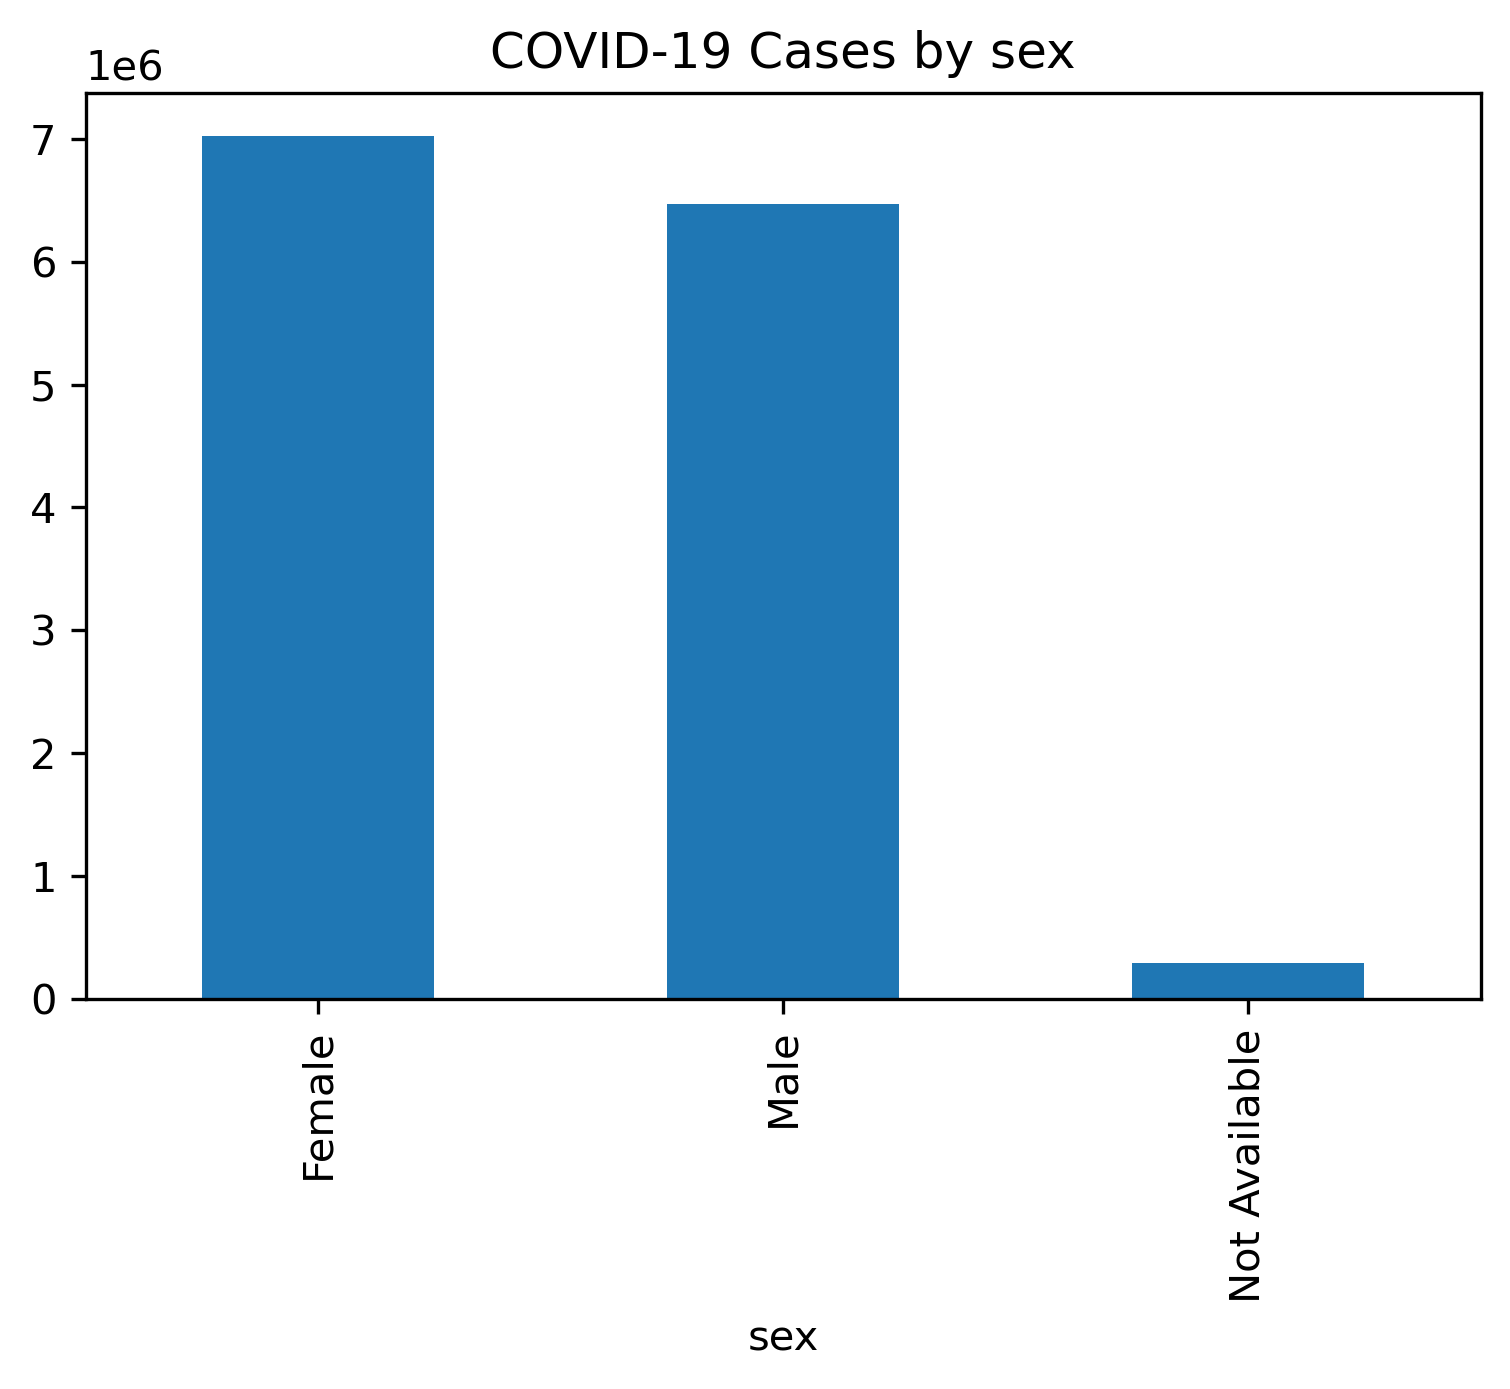

In [37]:
covid_df.groupby(['sex']).size().plot.bar()
plt.title("COVID-19 Cases by sex")
plt.show()

In [38]:
# covid_df.describe(include = 'all',datetime_is_numeric=True) #describe and include string columns

In [39]:
#covid cases trend
# trend_df = covid_df.groupby(['date']).size().reset_index(name = 'case_count').set_index('date')
# trend_df['case_count_per_100k'] = trend_df['case_count']/100000
# plt.plot(trend_df.index,trend_df['case_count_per_100k'])
# plt.title('COVID-19 Cases Have Spiked Twice And Is Trending Upwards')
# plt.xlabel('Date')
# plt.ylabel('Case Count (Hundred Thousand)')
# plt.xticks(rotation=90)
# plt.show()

In [40]:
# trend_df.head()

In [41]:
# comparing cases with vaccine administration rates
# case_vax_ax = ny_m_plt.plot(x="date", y=["admin_per_100k_12plus", "admin_per_100k_18plus", "admin_per_100k_65plus"], kind="line")
# trend_df.plot(y="case_count", kind="line", ax=case_vax_ax, title="COVID-19 Cases and Vaccinations per Age Group");                            

When comparing the COVID case trends with the trends in vaccine administration across each age group, it can be seen that the number of cases starts to sharply decline as the population recieves the vaccine. The case_count trend line was already falling when the vaccines were made available. However, once more of the population started to get vaccinated the case numbers stayed low up until the omicron variant began spreading around November of 2021 up until now (mid-January 2022).

In [42]:
# case_comp_ax = daily_plt.plot(x="date", y='series_complete', kind="line")
# trend_df.plot(y="case_count", kind="line", ax=case_comp_ax, title="COVID-19 Cases and Complete Vaccine Series");

In [43]:
# covid_65plus = covid_df.loc[covid_df["age_group"] == "65+ years"]


In [44]:
# df_covid65 = covid_65plus.groupby(['date']).size().reset_index(name = 'case_count').set_index('date')

# df_covid65.plot(title="Trend in COVID-19 Cases for Age 65+");

In [45]:
# covid65_ax = ny_m_plt.plot(x="date", y="admin_per_100k_65plus", kind="line")
# df_covid65.plot(y="case_count", kind="line", ax=covid65_ax, title="COVID-19 Cases and Vaccinations for Age 65+");

# Average Number of Cases Before and After the Release of COVID-19 Vaccines
#### Is the number of cases before and after the deployment of COVID-19 vaccines statiscally significant? 

In [46]:
# firstly, according to the CDC's vaccination dataset, when is the first recorded vaccination date?
df2 = df
df2 = df2.set_index("date")
df2 = df2.loc[(df2 !=0).any(axis=1), :]
df2 = df2.sort_values(by="date",ascending=True)
df2

# the earliest date of vaccine administration from any manufacturer is Dec 14, 2020 
# this was verified by visual inspection of the dataset 

,state,admin_12plus,admin_18plus,admin_65plus,admin_janssen,admin_moderna,admin_pfizer,admin_unk,admin_per_100k,admin_per_100k_12plus,...,additional_doses_12plus,additional_doses_12plus_vax_pct,additional_doses_18plus,additional_doses_18plus_vax_pct,additional_doses_65plus,additional_doses_65plus_vax_pct,additional_doses_moderna,additional_doses_pfizer,additional_doses_janssen,additional_doses_unk_manuf
date,,,,,,,,,,,,,,,,,,,,,
2020-12-14,MT,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0.0,0,0.0,0,0,0,0
2020-12-14,OR,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0.0,0,0.0,0,0,0,0
2020-12-14,NH,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0.0,0,0.0,0,0,0,0
2020-12-14,CO,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0.0,0,0.0,0,0,0,0
2020-12-14,AL,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0.0,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-17,PA,21566561,20303025,6219857,771425,8561858,12917649,1446,173820,194617,...,3582077,43.0,3468296,44.4,1391136,62.9,1570966,1952358,59334,62
2022-03-17,AL,6033524,5731886,1839197,175916,2673534,3288962,488,125202,144105,...,858843,35.2,845021,36.6,395244,57.2,423584,419893,15380,94
2022-03-17,IA,4809817,4527078,1454508,177365,1965382,2811223,525,157033,179720,...,1008080,53.9,981300,56.1,399656,78.5,460613,533820,13726,38


In [47]:
# case_prevax1 = covid_df[~covid_df["state"].isin(["TX"])]
# case_prevax1 = case_prevax1.groupby("date", as_index=False).size()
# case_prevax1 = case_prevax1.rename(columns={"size":"cases"})
# case_prevax1 = case_prevax1[(case_prevax1["date"] <= "2020-12-01")]
# case_prevax1 
# print("The average number of cases BEFORE vaccine release is:")
# print(case_prevax1["cases"].mean())

The average number of cases BEFORE vaccine release is:
480397.5833333333


In [63]:
# assuming that the vaccines take ~ 1 month to become effective
case_prevax1 = covid_df[~covid_df["state"].isin(["TX"])]
case_prevax1 = case_prevax1.groupby("date", as_index=False).size()
case_prevax1 = case_prevax1.rename(columns={"size":"cases"})
case_prevax1 = case_prevax1[(case_prevax1["date"] <= "2021-03-01")]
case_prevax1 
print("The average number of cases BEFORE vaccine release is:")
print(case_prevax1["cases"].mean())

The average number of cases BEFORE vaccine release is:
574229.6


In [64]:
case_prevax1

,date,cases
0,2020-01-01,971
1,2020-02-01,1868
2,2020-03-01,182583
3,2020-04-01,352624
4,2020-05-01,278068
5,2020-06-01,346750
6,2020-07-01,519825
7,2020-08-01,406416
8,2020-09-01,323389
9,2020-10-01,529376


<AxesSubplot:xlabel='date'>

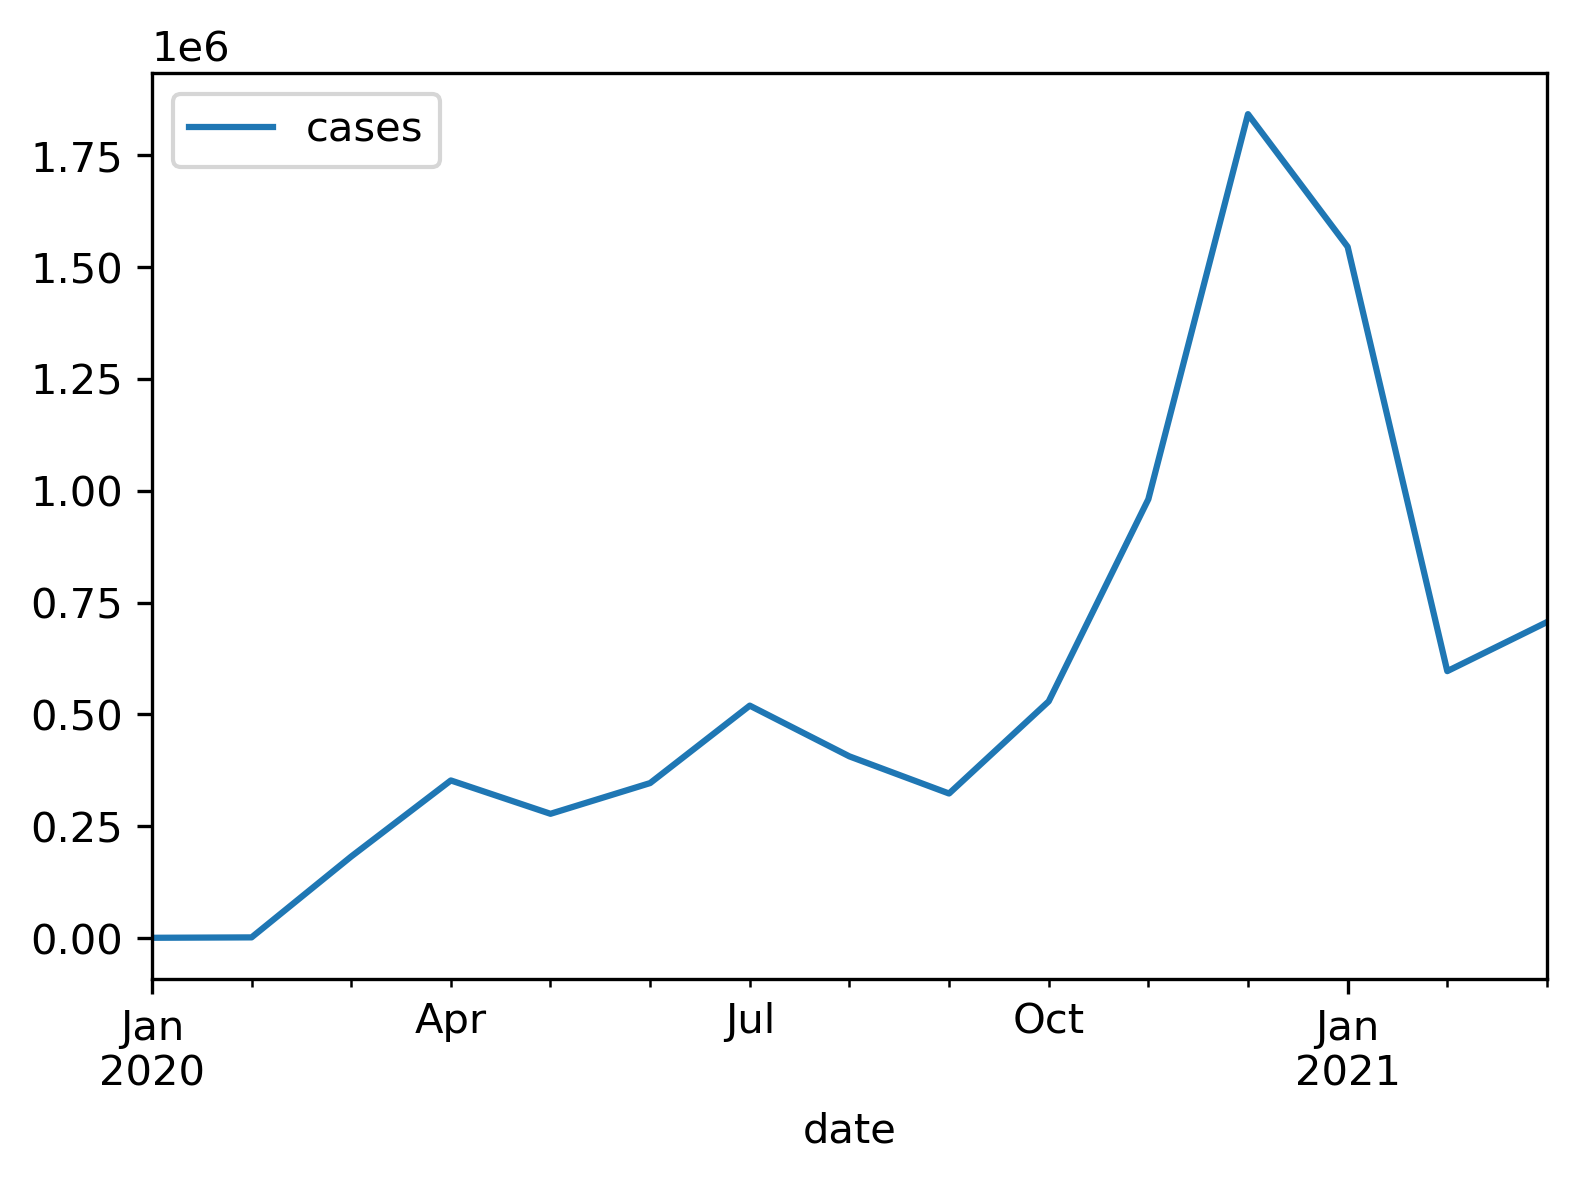

In [65]:
case_prevax1.plot(x = "date", y = "cases")

In [51]:
# case_postvax1 = covid_df[~covid_df["state"].isin(["TX"])]
# case_postvax1 = case_postvax1.groupby("date", as_index=False).size()
# case_postvax1 = case_postvax1.rename(columns={"size":"cases"})
# case_postvax1 = case_postvax1[(case_postvax1["date"] > "2020-12-01")]

# print("The average number of cases AFTER vaccine release is:")
# print(case_postvax1["cases"].mean())

The average number of cases AFTER vaccine release is:
668424.3333333334


In [66]:
# assuming that the vaccines take ~ 1 month to become effective
case_postvax1 = covid_df[~covid_df["state"].isin(["TX"])]
case_postvax1 = case_postvax1.groupby("date", as_index=False).size()
case_postvax1 = case_postvax1.rename(columns={"size":"cases"})
case_postvax1 = case_postvax1[(case_postvax1["date"] > "2021-03-01")]

print("The average number of cases AFTER vaccine release is:")
print(case_postvax1["cases"].mean())

The average number of cases AFTER vaccine release is:
574713.2222222222


<AxesSubplot:xlabel='date'>

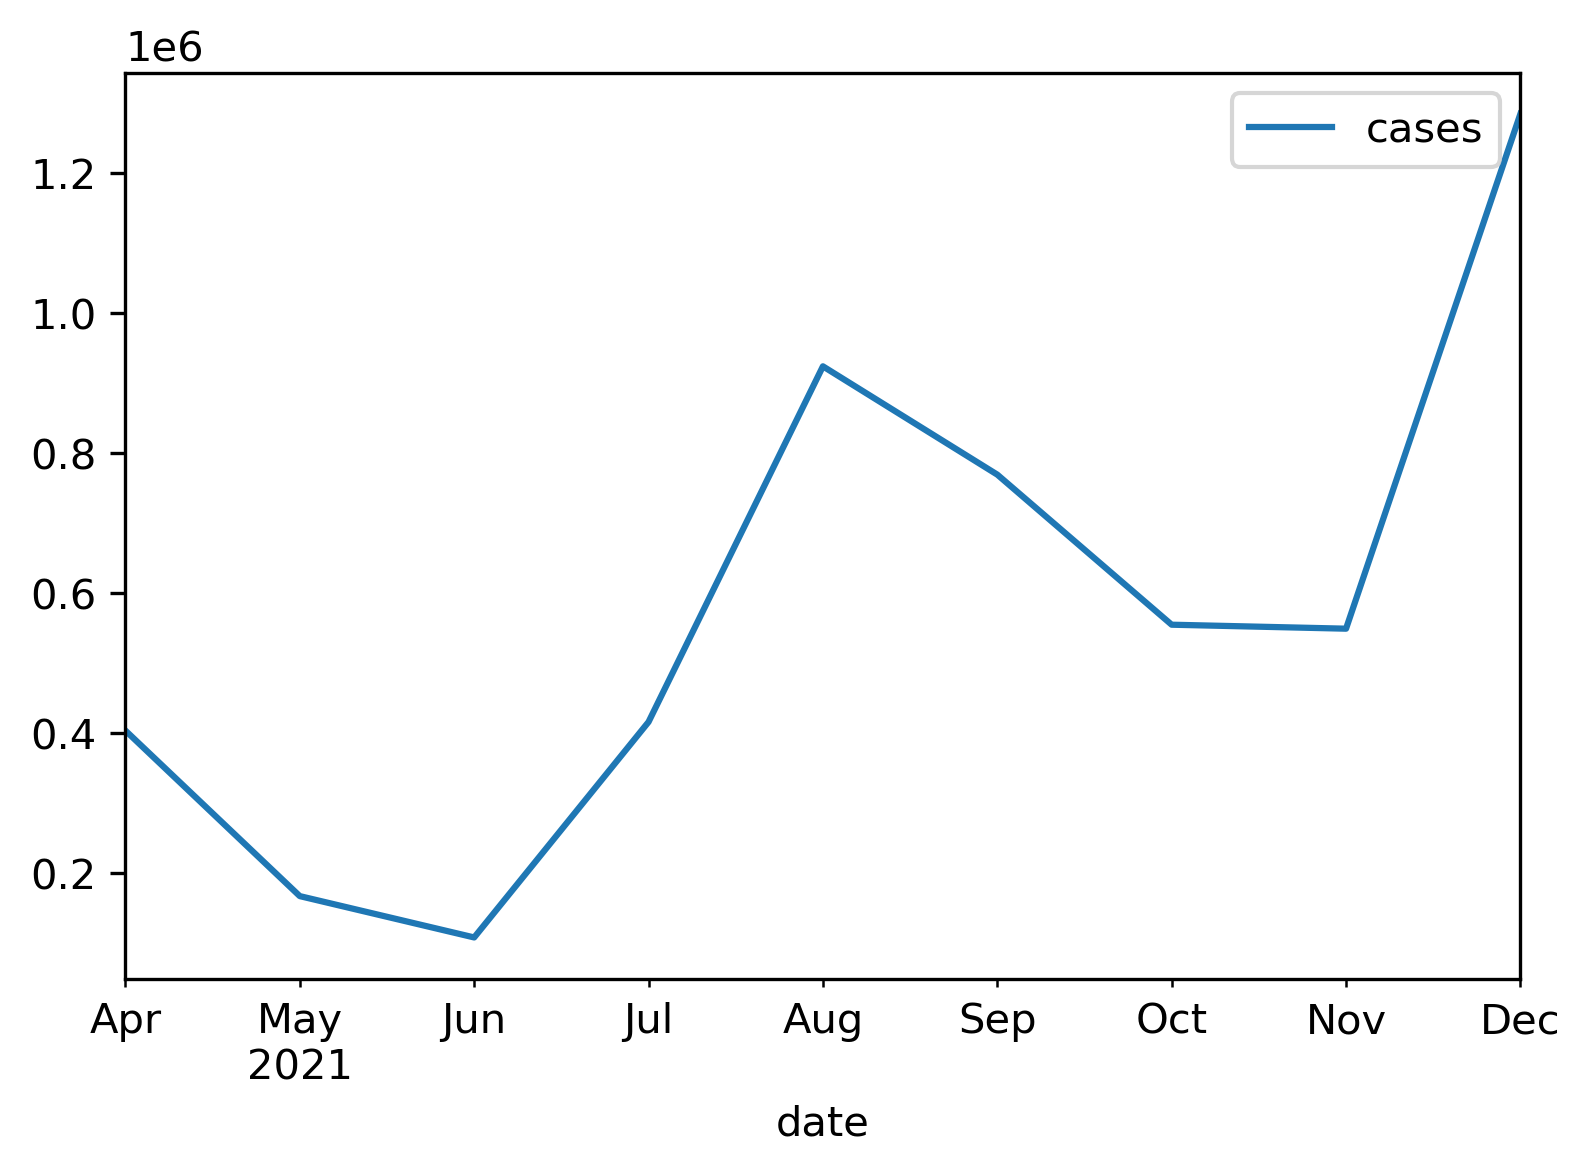

In [67]:
case_postvax1.plot(x="date", y="cases")

# Analyzing the Impact of Different Factors on Case Trends
### Applying multiple regression to a new data frame containing case counts for each state by month, vaccine administration per month for each manufacturer, and analyzing demographic factors

In [54]:
# working with covid_cases_4state.csv dataframe, i.e. covid_df
# cases per state

cases_df = covid_df.groupby(["date", "state"], as_index=False).size()
cases_df = cases_df.rename(columns={"size":"cases"})
cases_df = cases_df[~(cases_df["date"] <= "2020-12-01")]


In [55]:
# exporting covid cases per month to csv

# cases_df.to_csv("covid_cases.csv", index=False)

In [56]:
# converting state names to numerics to fit regression line
# CA:1, FL:2, NY:3, IL:4
numstate = {"CA":1, "FL":2, "NY":3, "IL":4}
cases_df["state"] = cases_df["state"].replace(numstate)

In [57]:
cases_df

,date,state,cases
47,2021-01-01,1,877185
48,2021-01-01,2,207612
49,2021-01-01,4,127099
50,2021-01-01,3,333399
51,2021-02-01,1,182380
52,2021-02-01,2,165000
53,2021-02-01,4,50197
54,2021-02-01,3,199327
55,2021-03-01,1,83365
56,2021-03-01,2,330204


In [58]:
# now working with the state_vax.csv dataframe

keep_state = ["NY", "CA", "FL", "IL"]
vax_df = df.loc[df["state"].isin(keep_state)]


# df_4state_m = df_4state.set_index("date")
# df_4state_m = df_4state_m.groupby(df_4state_m.index.strftime("%Y-%m")).tail(1)
# df_4state_m = df_4state_m.reset_index().sort_values(by="date", ascending=True)
# manuf_4state_m = df_4state_m[["date","state", "admin_janssen", "admin_moderna", "admin_pfizer", "admin_unk"]]

In [61]:
florida = vax_df.loc[vax_df["state"].isin(["FL"])]

In [62]:
florida

,date,state,admin_12plus,admin_18plus,admin_65plus,admin_janssen,admin_moderna,admin_pfizer,admin_unk,admin_per_100k,...,additional_doses_12plus,additional_doses_12plus_vax_pct,additional_doses_18plus,additional_doses_18plus_vax_pct,additional_doses_65plus,additional_doses_65plus_vax_pct,additional_doses_moderna,additional_doses_pfizer,additional_doses_janssen,additional_doses_unk_manuf
46,2022-03-17,FL,35651832,33780009,11700622,1463247,13420349,21352597,135343,169345,...,5531020,39.7,5419783,41.3,2444752,60.3,2381987,3041668,101660,6481
73,2022-03-16,FL,35627021,33757396,11695527,1462416,13412779,21334487,134923,169220,...,5521457,39.7,5411111,41.2,2442549,60.2,2379150,3035167,101474,6428
145,2022-03-15,FL,35626937,33757312,11695503,1462415,13412739,21334442,134923,169219,...,5521346,39.7,5411005,41.2,2442507,60.2,2379081,3035124,101474,6428
218,2022-03-14,FL,35619716,33750816,11694629,1462243,13411085,21328275,134904,169182,...,5518103,39.7,5408093,41.2,2442086,60.2,2378155,3032845,101434,6427
289,2022-03-13,FL,35610502,33742644,11693183,1462068,13408394,21320734,134892,169134,...,5513711,39.6,5404165,41.2,2441298,60.2,2376647,3030000,101394,6425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29366,2020-12-18,FL,0,0,0,0,0,10133,0,47,...,0,0.0,0,0.0,0,0.0,0,0,0,0
29409,2020-12-17,FL,0,0,0,0,0,2540,0,12,...,0,0.0,0,0.0,0,0.0,0,0,0,0
29510,2020-12-16,FL,0,0,0,0,0,29,0,0,...,0,0.0,0,0.0,0,0.0,0,0,0,0
29587,2020-12-15,FL,0,0,0,0,0,0,0,0,...,0,0.0,0,0.0,0,0.0,0,0,0,0


In [55]:
vax_df = vax_df[vax_df["date"].dt.is_month_start].sort_values(by="date", ascending=True)
vax_df = vax_df[["date","state", "admin_janssen", "admin_moderna", "admin_pfizer", "admin_unk"]]


numstate = {"CA":1, "FL":2, "NY":3, "IL":4}
vax_df["state"] = vax_df["state"].replace(numstate)

In [56]:
# vax_df

In [57]:
# vax_df.dtypes

In [58]:
vax_df = vax_df.sort_values(["date", "state"])
vax_df = vax_df.join(vax_df.groupby("state")[["admin_janssen", "admin_moderna", "admin_pfizer", "admin_unk"]].diff().fillna(0), rsuffix="_diff")


In [59]:
vax_df_diff = vax_df.drop(columns=["admin_janssen", "admin_moderna", "admin_pfizer", "admin_unk"])

In [60]:
vax_df_diff

,date,state,admin_janssen_diff,admin_moderna_diff,admin_pfizer_diff,admin_unk_diff
28402,2021-01-01,1,0.0,0.0,0.0,0.0
28443,2021-01-01,2,0.0,0.0,0.0,0.0
28451,2021-01-01,3,0.0,0.0,0.0,0.0
28440,2021-01-01,4,0.0,0.0,0.0,0.0
26418,2021-02-01,1,0.0,1539751.0,1539036.0,0.0
26400,2021-02-01,2,0.0,867328.0,898940.0,1301.0
26399,2021-02-01,3,0.0,861108.0,837858.0,200.0
26414,2021-02-01,4,0.0,415968.0,474188.0,185.0
24596,2021-03-01,1,352.0,2859867.0,2792564.0,10.0
24593,2021-03-01,2,0.0,1537425.0,1501240.0,3917.0


In [61]:
# exporting vax_df_diff to csv

# vax_df_diff.to_csv("covid_vax.csv", index=False)

In [62]:
vax_df_diff.describe(include = 'all', datetime_is_numeric=True)

,date,state,admin_janssen_diff,admin_moderna_diff,admin_pfizer_diff,admin_unk_diff
count,60,60.000000,60.000000,6.000000e+01,6.000000e+01,60.000000
mean,2021-08-01 04:48:00,2.500000,97079.033333,1.020257e+06,1.652772e+06,3274.400000
min,2021-01-01 00:00:00,1.000000,0.000000,0.000000e+00,0.000000e+00,-1485.000000
25%,2021-04-01 00:00:00,1.750000,22260.250000,3.557280e+05,8.938182e+05,816.500000
50%,2021-08-01 00:00:00,2.500000,56864.500000,7.033335e+05,1.344396e+06,1677.500000
75%,2021-12-01 00:00:00,3.250000,120758.500000,1.315977e+06,2.039256e+06,3921.500000
max,2022-03-01 00:00:00,4.000000,731072.000000,4.850227e+06,6.633513e+06,16986.000000
std,NaN,1.127469,126156.367510,9.795663e+05,1.254088e+06,4143.133471


In [63]:
vax_df_diff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 28402 to 960
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                60 non-null     datetime64[ns]
 1   state               60 non-null     int64         
 2   admin_janssen_diff  60 non-null     float64       
 3   admin_moderna_diff  60 non-null     float64       
 4   admin_pfizer_diff   60 non-null     float64       
 5   admin_unk_diff      60 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 5.3 KB


In [64]:
merged_case_vax = pd.merge(cases_df, vax_df_diff, on=["date", "state"], how="inner")


In [65]:
shiftcol = ["admin_janssen_diff", "admin_moderna_diff", "admin_pfizer_diff", "admin_unk_diff"]
merged_case_vax[shiftcol] = merged_case_vax[shiftcol].shift(4)

In [66]:
merged_case_vax

,date,state,cases,admin_janssen_diff,admin_moderna_diff,admin_pfizer_diff,admin_unk_diff
0,2021-01-01,1,877185,NaN,NaN,NaN,NaN
1,2021-01-01,2,207612,NaN,NaN,NaN,NaN
2,2021-01-01,4,127099,NaN,NaN,NaN,NaN
3,2021-01-01,3,333399,NaN,NaN,NaN,NaN
4,2021-02-01,1,182380,0.0,0.0,0.0,0.0
5,2021-02-01,2,165000,0.0,0.0,0.0,0.0
6,2021-02-01,4,50197,0.0,0.0,0.0,0.0
7,2021-02-01,3,199327,0.0,0.0,0.0,0.0
8,2021-03-01,1,83365,0.0,1539751.0,1539036.0,0.0
9,2021-03-01,2,330204,0.0,867328.0,898940.0,1301.0


In [67]:
corr = merged_case_vax.corr()
corr

,state,cases,admin_janssen_diff,admin_moderna_diff,admin_pfizer_diff,admin_unk_diff
state,1.000000,-0.264361,-0.302399,-0.421932,-0.503819,-0.180369
cases,-0.264361,1.000000,-0.250877,-0.341484,-0.183563,-0.051162
admin_janssen_diff,-0.302399,-0.250877,1.000000,0.784740,0.874569,0.147303
admin_moderna_diff,-0.421932,-0.341484,0.784740,1.000000,0.917744,-0.048625
admin_pfizer_diff,-0.503819,-0.183563,0.874569,0.917744,1.000000,0.041425
admin_unk_diff,-0.180369,-0.051162,0.147303,-0.048625,0.041425,1.000000


In [68]:
corr_state = merged_case_vax.groupby("state").corr()
corr_state

cases  admin_janssen_diff  admin_moderna_diff  \
state                                                                        
1     cases               1.000000           -0.304657           -0.628733   
      admin_janssen_diff -0.304657            1.000000            0.788978   
      admin_moderna_diff -0.628733            0.788978            1.000000   
      admin_pfizer_diff  -0.320532            0.893908            0.902387   
      admin_unk_diff      0.218443            0.385772            0.062842   
2     cases               1.000000           -0.255071           -0.429288   
      admin_janssen_diff -0.255071            1.000000            0.632117   
      admin_moderna_diff -0.429288            0.632117            1.000000   
      admin_pfizer_diff  -0.447282            0.815641            0.867792   
      admin_unk_diff     -0.117227            0.401374           -0.028690   
3     cases               1.000000           -0.549299           -0.538941   
      admin_janssen_diff -0.549299            1.000000            0.806851   
      admin_moderna_diff -0.538941            0.806851            1.000000   
      admin_pfizer_diff  -0.480986            0.945125            0.908624   
      admin_unk_diff     -0.086253            0.550262            0.152306   
4     cases               1.000000           -0.411668           -0.415706   
      admin_janssen_diff -0.411668            1.000000            0.735432   
      admin_moderna_diff -0.415706            0.735432            1.000000   
      admin_pfizer_diff  -0.331937            0.920821            0.877715   
      admin_unk_diff     -0.378712            0.418598            0.047005   

                          admin_pfizer_diff  admin_unk_diff  
state                                                        
1     cases                       -0.320532        0.218443  
      admin_janssen_diff           0.893908        0.385772  
      admin_moderna_diff           0.902387        0.062842  
      admin_pfizer_diff            1.000000        0.329898  
      admin_unk_diff               0.329898        1.000000  
2     cases                       -0.447282       -0.117227  
      admin_janssen_diff           0.815641        0.401374  
      admin_moderna_diff           0.867792       -0.028690  
      admin_pfizer_diff            1.000000        0.394048  
      admin_unk_diff               0.394048        1.000000  
3     cases                       -0.480986       -0.086253  
      admin_janssen_diff           0.945125        0.550262  
      admin_moderna_diff           0.908624        0.152306  
      admin_pfizer_diff            1.000000        0.502141  
      admin_unk_diff               0.502141        1.000000  
4     cases                       -0.331937       -0.378712  
      admin_janssen_diff           0.920821        0.418598  
      admin_moderna_diff           0.877715        0.047005  
      admin_pfizer_diff            1.000000        0.318716  
      admin_unk_diff               0.318716        1.000000

In [69]:
formula1 = 'cases ~ admin_janssen_diff + admin_moderna_diff + admin_pfizer_diff + admin_unk_diff'
model1 = sm.ols(formula = formula1, data = merged_case_vax)
fitted1 = model1.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:                  cases   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     3.876
Date:                Wed, 16 Mar 2022   Prob (F-statistic):            0.00959
Time:                        18:24:22   Log-Likelihood:                -568.88
No. Observations:                  44   AIC:                             1148.
Df Residuals:                      39   BIC:                             1157.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.451e+05   3.12

In [70]:
# p values
fitted1.pvalues

Intercept             0.000037
admin_janssen_diff    0.144109
admin_moderna_diff    0.001434
admin_pfizer_diff     0.005218
admin_unk_diff        0.485498
dtype: float64

In [71]:
formula2 = 'cases ~ admin_janssen_diff + admin_moderna_diff + admin_pfizer_diff'
model2 = sm.ols(formula = formula2, data = merged_case_vax)
fitted2 = model2.fit()
print(fitted2.summary())

                            OLS Regression Results                            
Dep. Variable:                  cases   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     5.066
Date:                Wed, 16 Mar 2022   Prob (F-statistic):            0.00456
Time:                        18:24:22   Log-Likelihood:                -569.16
No. Observations:                  44   AIC:                             1146.
Df Residuals:                      40   BIC:                             1153.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.362e+05   2.83

In [72]:
fitted2.pvalues

Intercept             0.000022
admin_janssen_diff    0.098402
admin_moderna_diff    0.001630
admin_pfizer_diff     0.005249
dtype: float64

In [73]:
formula3 = 'cases ~ admin_moderna_diff + admin_pfizer_diff'
model3 = sm.ols(formula = formula3, data = merged_case_vax)
fitted3 = model3.fit()
print(fitted3.summary())

                            OLS Regression Results                            
Dep. Variable:                  cases   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     5.899
Date:                Wed, 16 Mar 2022   Prob (F-statistic):            0.00560
Time:                        18:24:22   Log-Likelihood:                -570.68
No. Observations:                  44   AIC:                             1147.
Df Residuals:                      41   BIC:                             1153.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.542e+05   2.68

In [74]:
fitted3.pvalues

Intercept             0.000001
admin_moderna_diff    0.002919
admin_pfizer_diff     0.022294
dtype: float64

In [75]:
moderna_cases = 'cases ~ admin_moderna_diff'
moderna_model = sm.ols(formula = moderna_cases, data = merged_case_vax)
moderna_fit = moderna_model.fit()
print(moderna_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  cases   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     5.544
Date:                Wed, 16 Mar 2022   Prob (F-statistic):             0.0233
Time:                        18:24:22   Log-Likelihood:                -573.52
No. Observations:                  44   AIC:                             1151.
Df Residuals:                      42   BIC:                             1155.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.874e+05   2.42

In [76]:
pfizer_cases = 'cases ~ admin_pfizer_diff'
pfizer_model = sm.ols(formula = pfizer_cases, data = merged_case_vax)
pfizer_fit = pfizer_model.fit()
print(pfizer_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  cases   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.465
Date:                Wed, 16 Mar 2022   Prob (F-statistic):              0.233
Time:                        18:24:22   Log-Likelihood:                -575.49
No. Observations:                  44   AIC:                             1155.
Df Residuals:                      42   BIC:                             1159.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.744e+05   2.87e+0

### Analyzing Demographics

Age Group, Gender, Race/Ethnicity


#### Age Group

#### Gender

**CA**

https://data.chhs.ca.gov/dataset/vaccine-progress-dashboard/resource/faee36da-bd8c-40f7-96d4-d8f283a12b0a?inner_span=True&filters=demographic_category%3AGender

In [285]:
ca_gender = pd.read_csv("data/ca_gender.csv")

In [286]:
ca_gender = ca_gender.drop(columns=["demographic_category", "booster_recip_count", "cumulative_booster_recip_count", 
                                   "cumulative_total_doses", "cumulative_pfizer_doses", "cumulative_moderna_doses", 
                                   "cumulative_jj_doses", "total_partially_vaccinated", "cumulative_fully_vaccinated", 
                                   "cumulative_at_least_one_dose"])
ca_gender = ca_gender.rename(columns={"administered_date" : "date"})


In [287]:
ca_gender["demographic_value"].unique()

array(['Male', 'Female', 'Unknown/undifferentiated'], dtype=object)

In [288]:
ca_gender = ca_gender[~ca_gender["demographic_value"].isin(["Unknown/undifferentiated"])]

In [289]:
ca_gender["date"] = pd.to_datetime(ca_gender["date"])

In [290]:
ca_gender = ca_gender[ca_gender["date"].dt.is_month_start].sort_values(by="date", ascending=True)

In [291]:
# ca_gender

In [292]:
ca_dup = ca_gender[ca_gender.duplicated(["date"], keep=False)].copy()

In [293]:
ca_bothgender = ca_dup.groupby("date")["pfizer_doses", "moderna_doses", "jj_doses"].apply(lambda x: x.sum())



<ipython-input-293-216bba762532>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ca_bothgender = ca_dup.groupby("date")["pfizer_doses", "moderna_doses", "jj_doses"].apply(lambda x: x.sum())


In [294]:
ca_bothgender = ca_bothgender.rename(columns={"pfizer_doses":"pfizer_both",
                                              "moderna_doses" : "moderna_both",
                                              "jj_doses" : "jj_both"}).reset_index()

In [295]:
# ca_bothgender

In [296]:
ca_gender = pd.merge(ca_gender, ca_bothgender, on="date", how="inner")

In [297]:
# ca_gender

In [298]:
ca_gender["pfizer_malepct"] = ca_gender.loc[ca_gender["demographic_value"] == "Male", "pfizer_doses"] / ca_gender["pfizer_both"]



In [299]:
ca_gender["moderna_malepct"] = ca_gender.loc[ca_gender["demographic_value"] == "Male", "moderna_doses"] / ca_gender["moderna_both"]



In [300]:
ca_gender["jj_malepct"] = ca_gender.loc[ca_gender["demographic_value"] == "Male", "jj_doses"] / ca_gender["jj_both"]



In [301]:
ca_gender["pfizer_femalepct"] = ca_gender.loc[ca_gender["demographic_value"] == "Female", "pfizer_doses"] / ca_gender["pfizer_both"]



In [302]:
ca_gender["moderna_femalepct"] = ca_gender.loc[ca_gender["demographic_value"] == "Female", "moderna_doses"] / ca_gender["moderna_both"]



In [303]:
ca_gender["jj_femalepct"] = ca_gender.loc[ca_gender["demographic_value"] == "Female", "jj_doses"] / ca_gender["jj_both"]



In [304]:
# creating a new df to use percentages of each gender demo with the covid case data and vax data 

ca_genderpct = ca_gender[["date","pfizer_malepct", "moderna_malepct", "jj_malepct", "pfizer_femalepct", "moderna_femalepct", "jj_femalepct"]]
                             

In [305]:
ca_genderpct = ca_genderpct.groupby("date").agg({"pfizer_malepct" : "first", "moderna_malepct" : "first",
                                                              "jj_malepct" : "first", "pfizer_femalepct" : "first", 
                                                              "moderna_femalepct" : "first", "jj_femalepct" : "first"}).fillna(0).reset_index()

In [306]:
# ca_genderpct

In [307]:
# filtering vax df and covid case df for CA


In [308]:
covid_gender = covid_df[covid_df["state"].isin(["CA"])]

In [309]:
covid_gender = covid_gender[~covid_gender["sex"].isin(["Not Available"])]

In [310]:
covid_gender = covid_gender.groupby(["date", "sex"]).size().reset_index(name="cases")

In [311]:
# covid_gender

In [312]:
case_gender = covid_gender.pivot(index="date", columns="sex", values="cases").reset_index().rename_axis(None, axis=1)

In [313]:
case_gender["case_tot"] = case_gender["Female"] + case_gender["Male"]

case_gender = case_gender.rename(columns={"Female" : "cases_female", "Male" : "cases_male"}) 

In [314]:
# remerge vax df with new case_gender

In [315]:
ca_vax_diff = vax_df_diff[vax_df_diff["state"].isin([1])]

In [316]:
ca_case_vax = pd.merge(case_gender, ca_vax_diff, on=["date"], how="inner" )

In [317]:
# need to shift the vax numbers as we did before
shiftcol = ["admin_janssen_diff", "admin_moderna_diff", "admin_pfizer_diff", "admin_unk_diff"]
ca_case_vax[shiftcol] = ca_case_vax[shiftcol].shift(1)

In [318]:
ca_covidgen =  pd.merge(ca_case_vax, ca_genderpct, on=["date"], how="inner")

In [319]:
# we are making the assumption that there is no preference on which vaccine manufacturer is administered 

# male cols
ca_covidgen["admin_janssen_male"] = (ca_covidgen["admin_janssen_diff"] * ca_covidgen["jj_malepct"]).round()

ca_covidgen["admin_moderna_male"] = (ca_covidgen["admin_moderna_diff"] * ca_covidgen["moderna_malepct"]).round()

ca_covidgen["admin_pfizer_male"] = (ca_covidgen["admin_pfizer_diff"] * ca_covidgen["pfizer_malepct"]).round()

# female cols
ca_covidgen["admin_janssen_female"] = (ca_covidgen["admin_janssen_diff"] * ca_covidgen["jj_femalepct"]).round()

ca_covidgen["admin_moderna_female"] = (ca_covidgen["admin_moderna_diff"] * ca_covidgen["moderna_femalepct"]).round()

ca_covidgen["admin_pfizer_female"] = (ca_covidgen["admin_pfizer_diff"] * ca_covidgen["pfizer_femalepct"]).round()



In [320]:
ca_covidgen


,date,cases_female,cases_male,case_tot,state,admin_janssen_diff,admin_moderna_diff,admin_pfizer_diff,admin_unk_diff,pfizer_malepct,...,jj_malepct,pfizer_femalepct,moderna_femalepct,jj_femalepct,admin_janssen_male,admin_moderna_male,admin_pfizer_male,admin_janssen_female,admin_moderna_female,admin_pfizer_female
0,2021-01-01,444099,416152,860251,1,NaN,NaN,NaN,NaN,0.430412,...,0.560284,0.569588,0.564265,0.439716,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01,90725,88556,179281,1,0.0,0.0,0.0,0.0,0.401580,...,0.539130,0.598420,0.563364,0.460870,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-03-01,40960,40596,81556,1,0.0,1539751.0,1539036.0,0.0,0.435514,...,0.484914,0.564486,0.561395,0.515086,0.0,675342.0,670271.0,0.0,864409.0,868765.0
3,2021-04-01,32799,31611,64410,1,352.0,2859867.0,2792564.0,10.0,0.479150,...,0.516532,0.520850,0.526763,0.483468,182.0,1353396.0,1338058.0,170.0,1506471.0,1454506.0
4,2021-05-01,19084,17779,36863,1,370149.0,4269462.0,4856850.0,1626.0,0.501734,...,0.622582,0.498266,0.491461,0.377418,230448.0,2171187.0,2436846.0,139701.0,2098275.0,2420004.0
5,2021-06-01,17639,16652,34291,1,731072.0,4850227.0,6633513.0,1859.0,0.493341,...,0.655199,0.506659,0.482667,0.344801,478998.0,2509180.0,3272583.0,252074.0,2341047.0,3360930.0
6,2021-07-01,102884,96959,199843,1,255978.0,2625843.0,4768392.0,1681.0,0.478236,...,0.631365,0.521764,0.491262,0.368635,161616.0,1335867.0,2280415.0,94362.0,1289976.0,2487977.0
7,2021-08-01,207631,197718,405349,1,198595.0,1147495.0,2951158.0,1708.0,0.509855,...,0.616745,0.490145,0.449309,0.383255,122483.0,631915.0,1504662.0,76112.0,515580.0,1446496.0
8,2021-09-01,125332,120407,245739,1,115222.0,680467.0,1705282.0,1791.0,0.479664,...,0.612239,0.520336,0.492171,0.387761,70543.0,345561.0,817963.0,44679.0,334906.0,887319.0
9,2021-10-01,89587,84546,174133,1,106021.0,702586.0,2022994.0,3802.0,0.433021,...,0.596899,0.566979,0.519711,0.403101,63284.0,337444.0,875999.0,42737.0,365142.0,1146995.0


<AxesSubplot:title={'center':'Rates of Vaccine Administration by Manufacturer and Sex in CA'}, xlabel='date'>

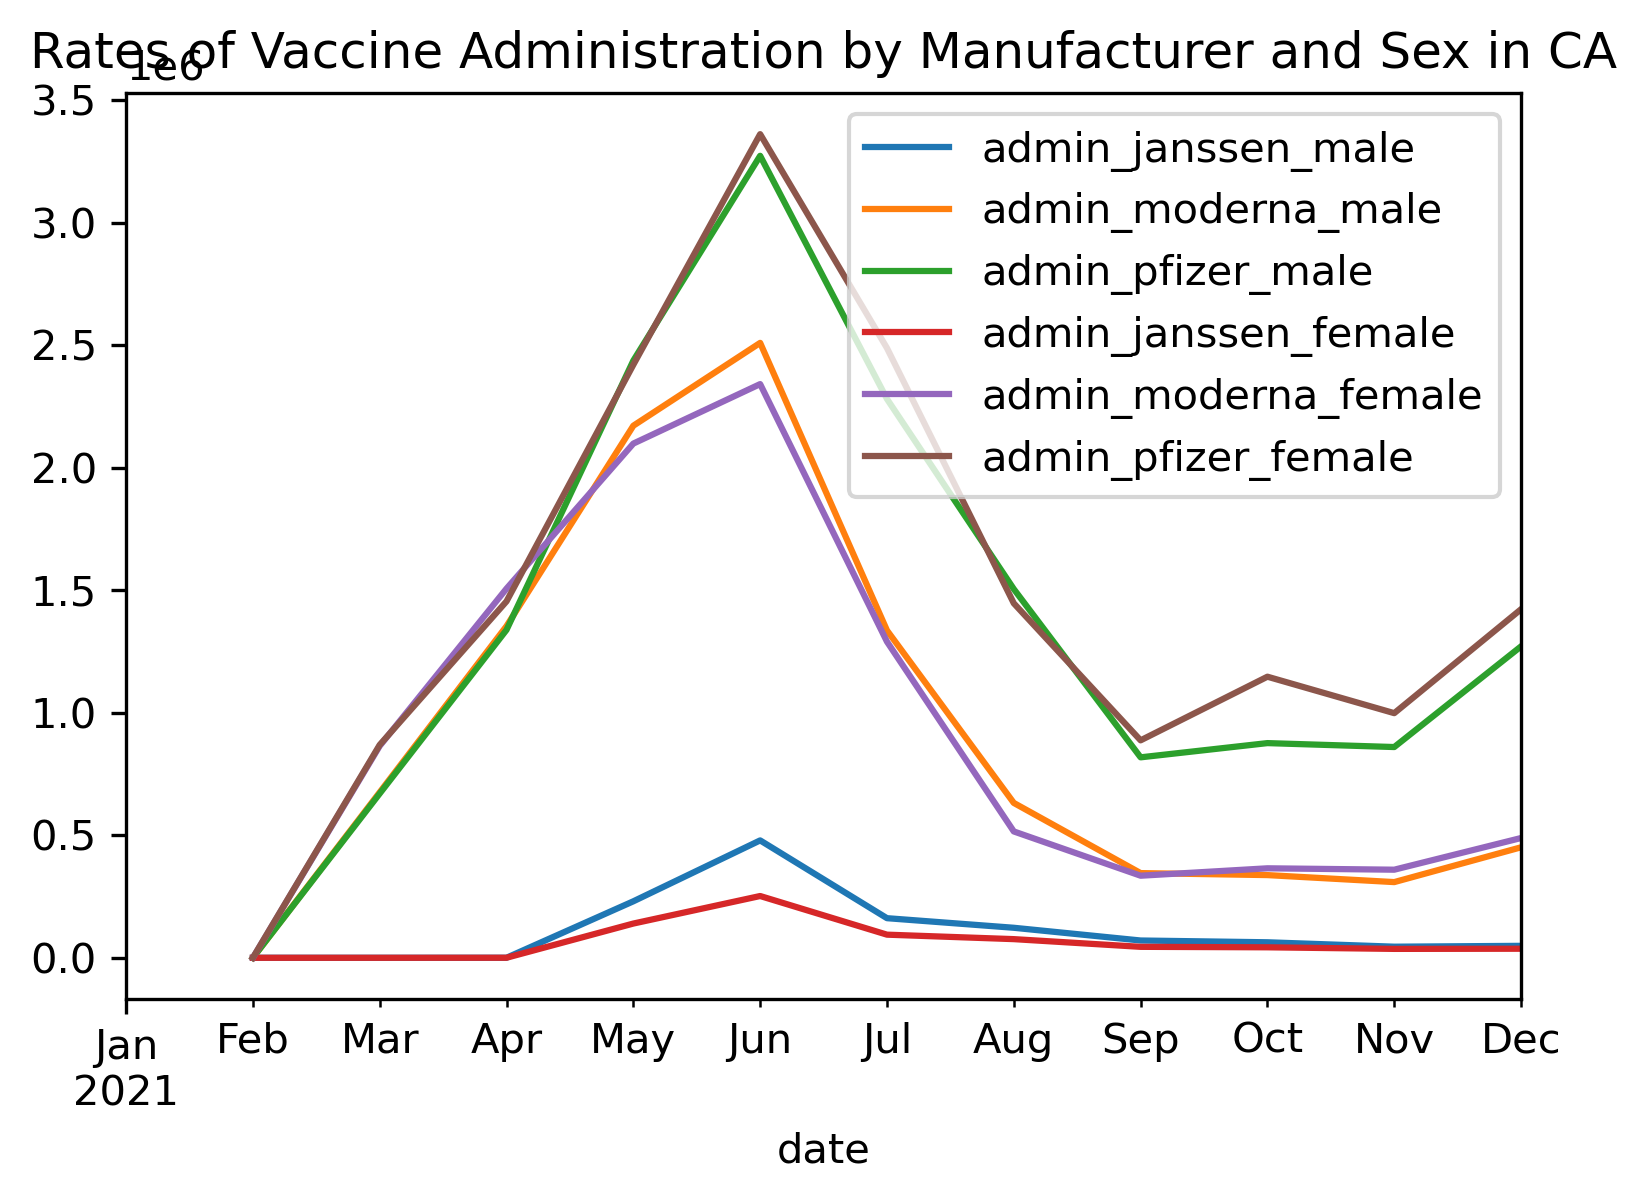

In [321]:
ca_covidgen.plot(x="date", y=["admin_janssen_male", "admin_moderna_male", "admin_pfizer_male",
                              "admin_janssen_female", "admin_moderna_female", "admin_pfizer_female"], kind="line", title="Rates of Vaccine Administration by Manufacturer and Sex in CA")



<AxesSubplot:title={'center':'Male Vaccine Administration by Manufacturer vs. Cases in CA'}, xlabel='date'>

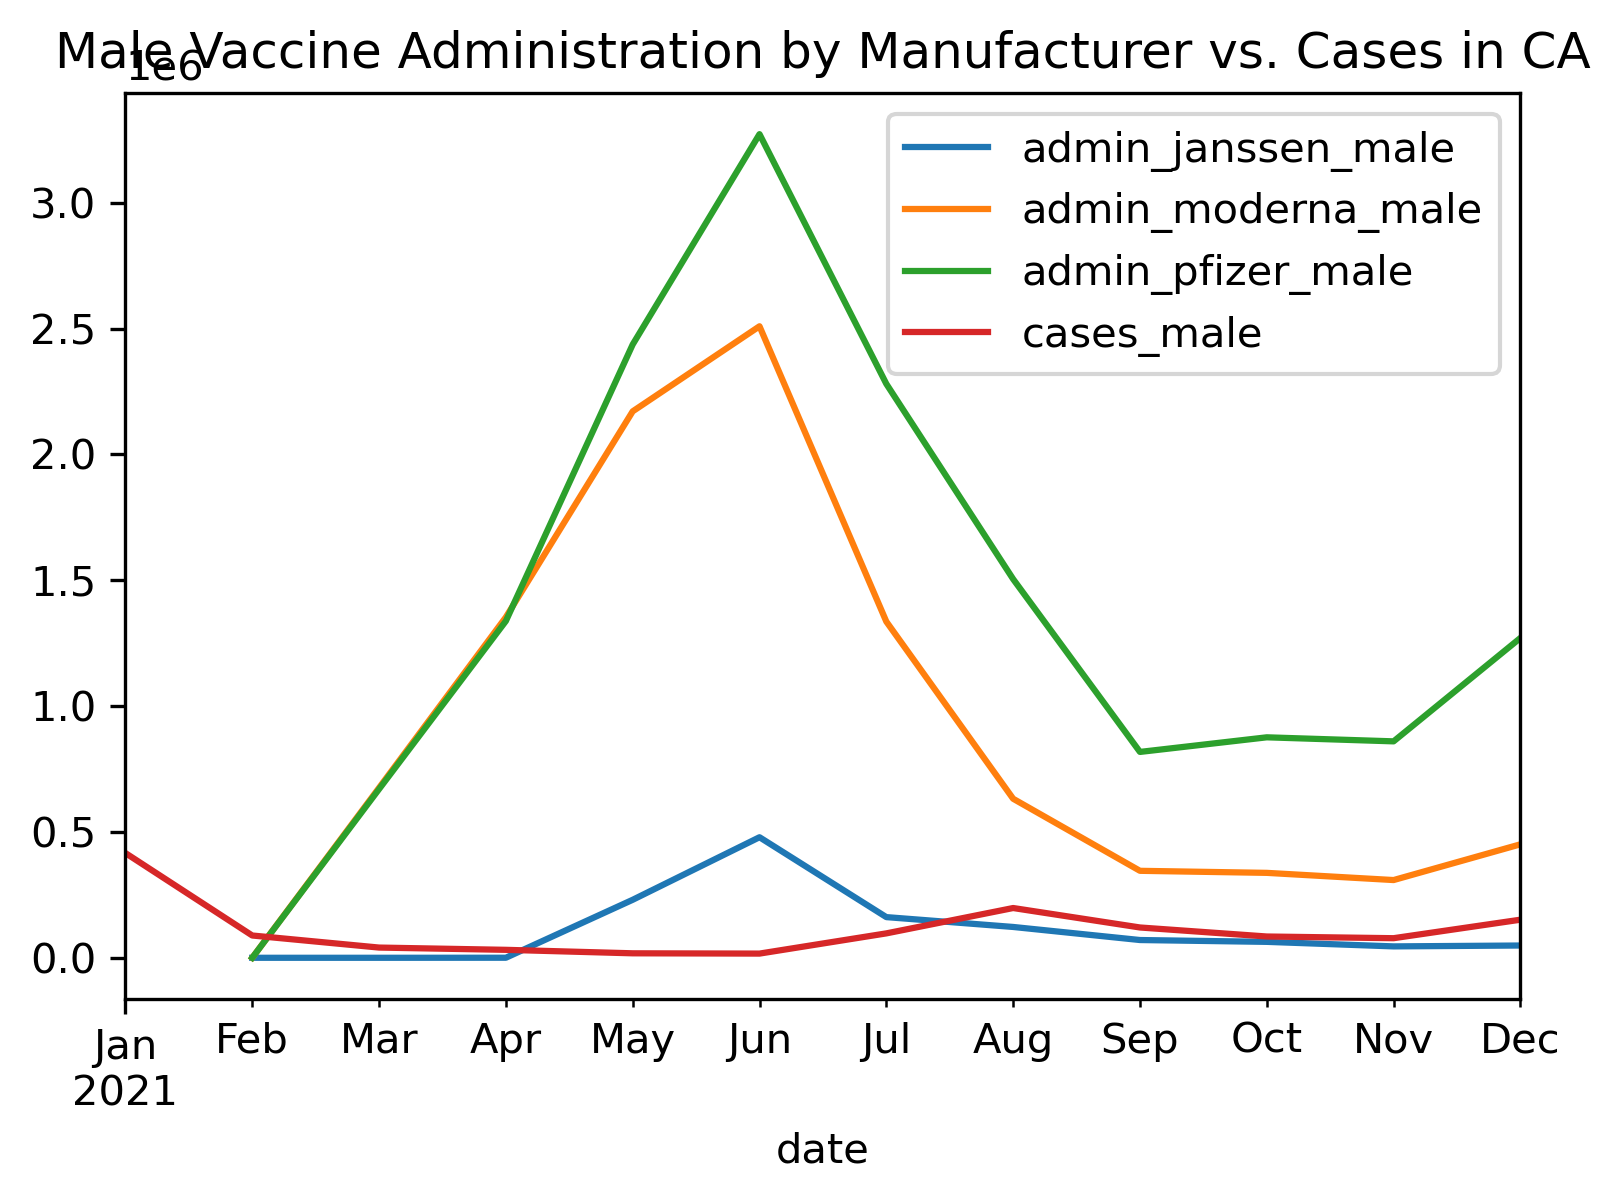

In [322]:
ca_covidgen.plot(x="date", y=["admin_janssen_male", "admin_moderna_male", "admin_pfizer_male",
                              "cases_male"], kind="line", title="Male Vaccine Administration by Manufacturer vs. Cases in CA")



<AxesSubplot:title={'center':'Female Vaccine Administration by Manufacturer vs. Cases in CA'}, xlabel='date'>

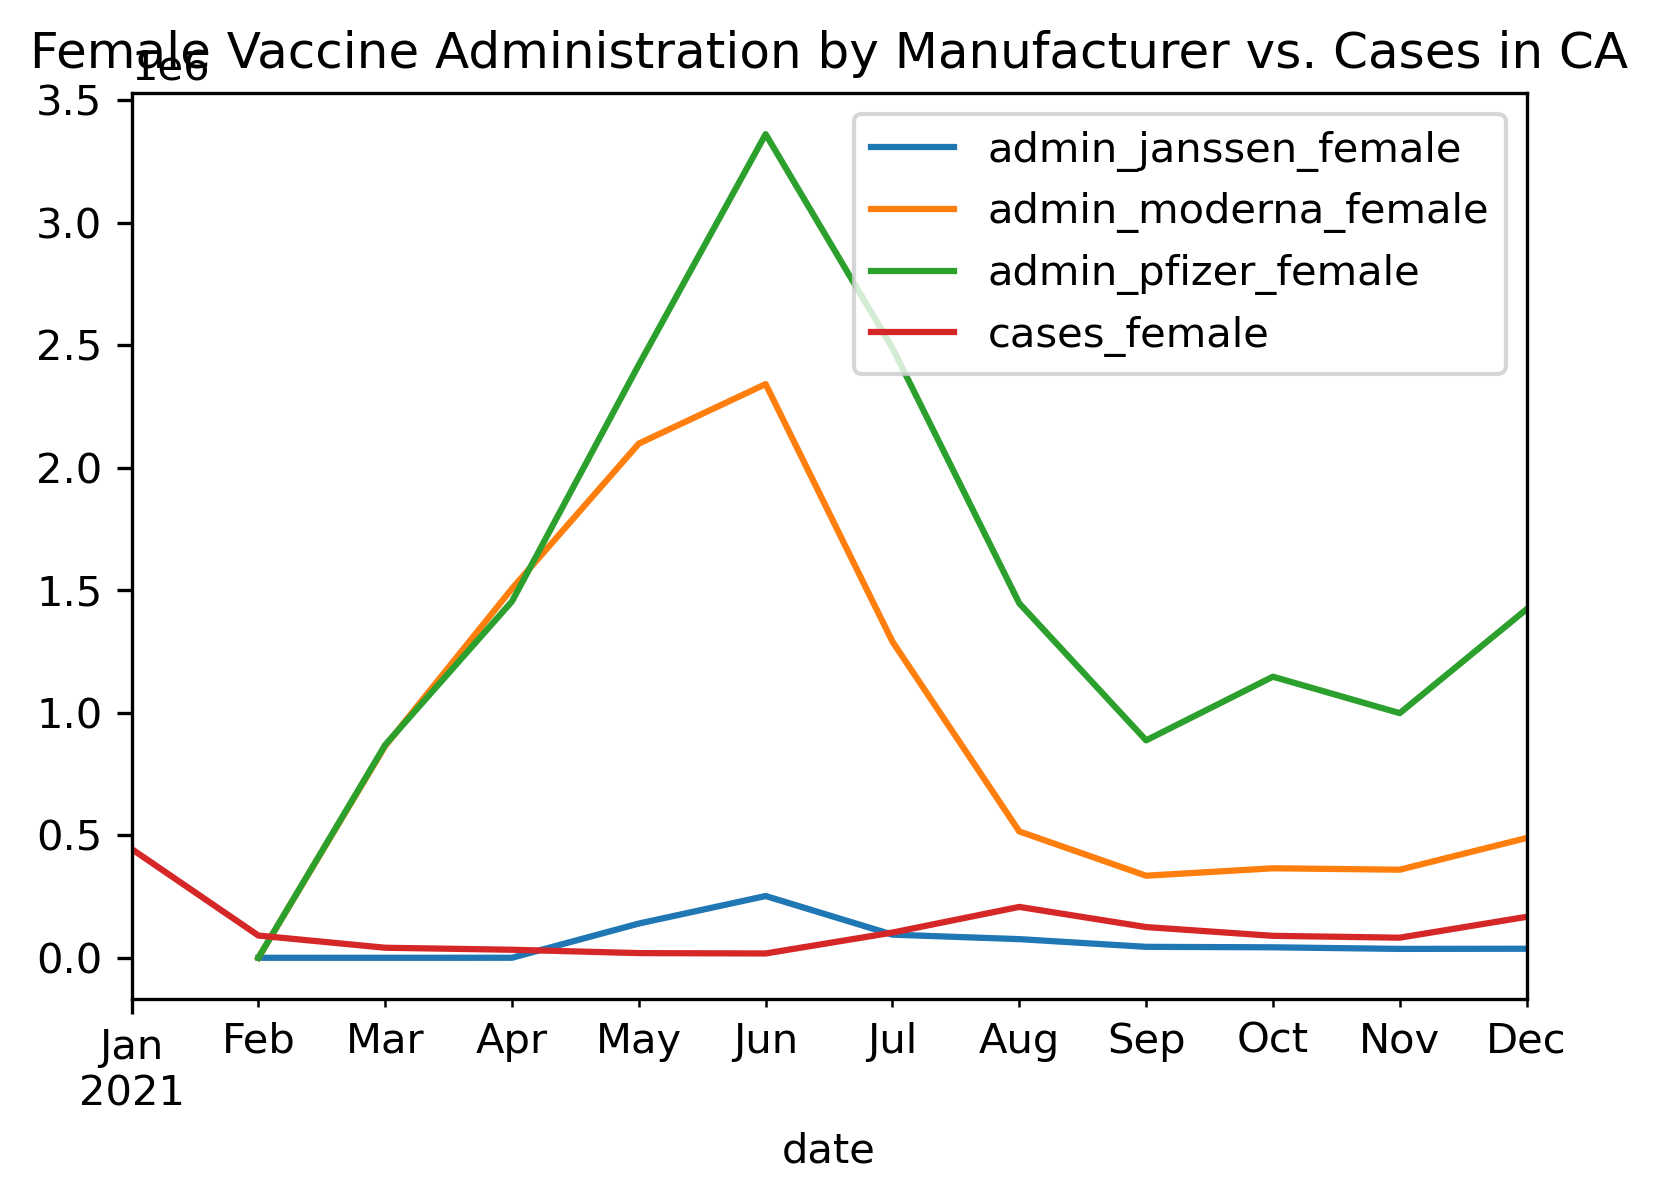

In [323]:
ca_covidgen.plot(x="date", y=["admin_janssen_female", "admin_moderna_female", "admin_pfizer_female",
                              "cases_female"], kind="line", title="Female Vaccine Administration by Manufacturer vs. Cases in CA")



<AxesSubplot:title={'center':'Rate of COVID Cases by Gender in CA'}, xlabel='date'>

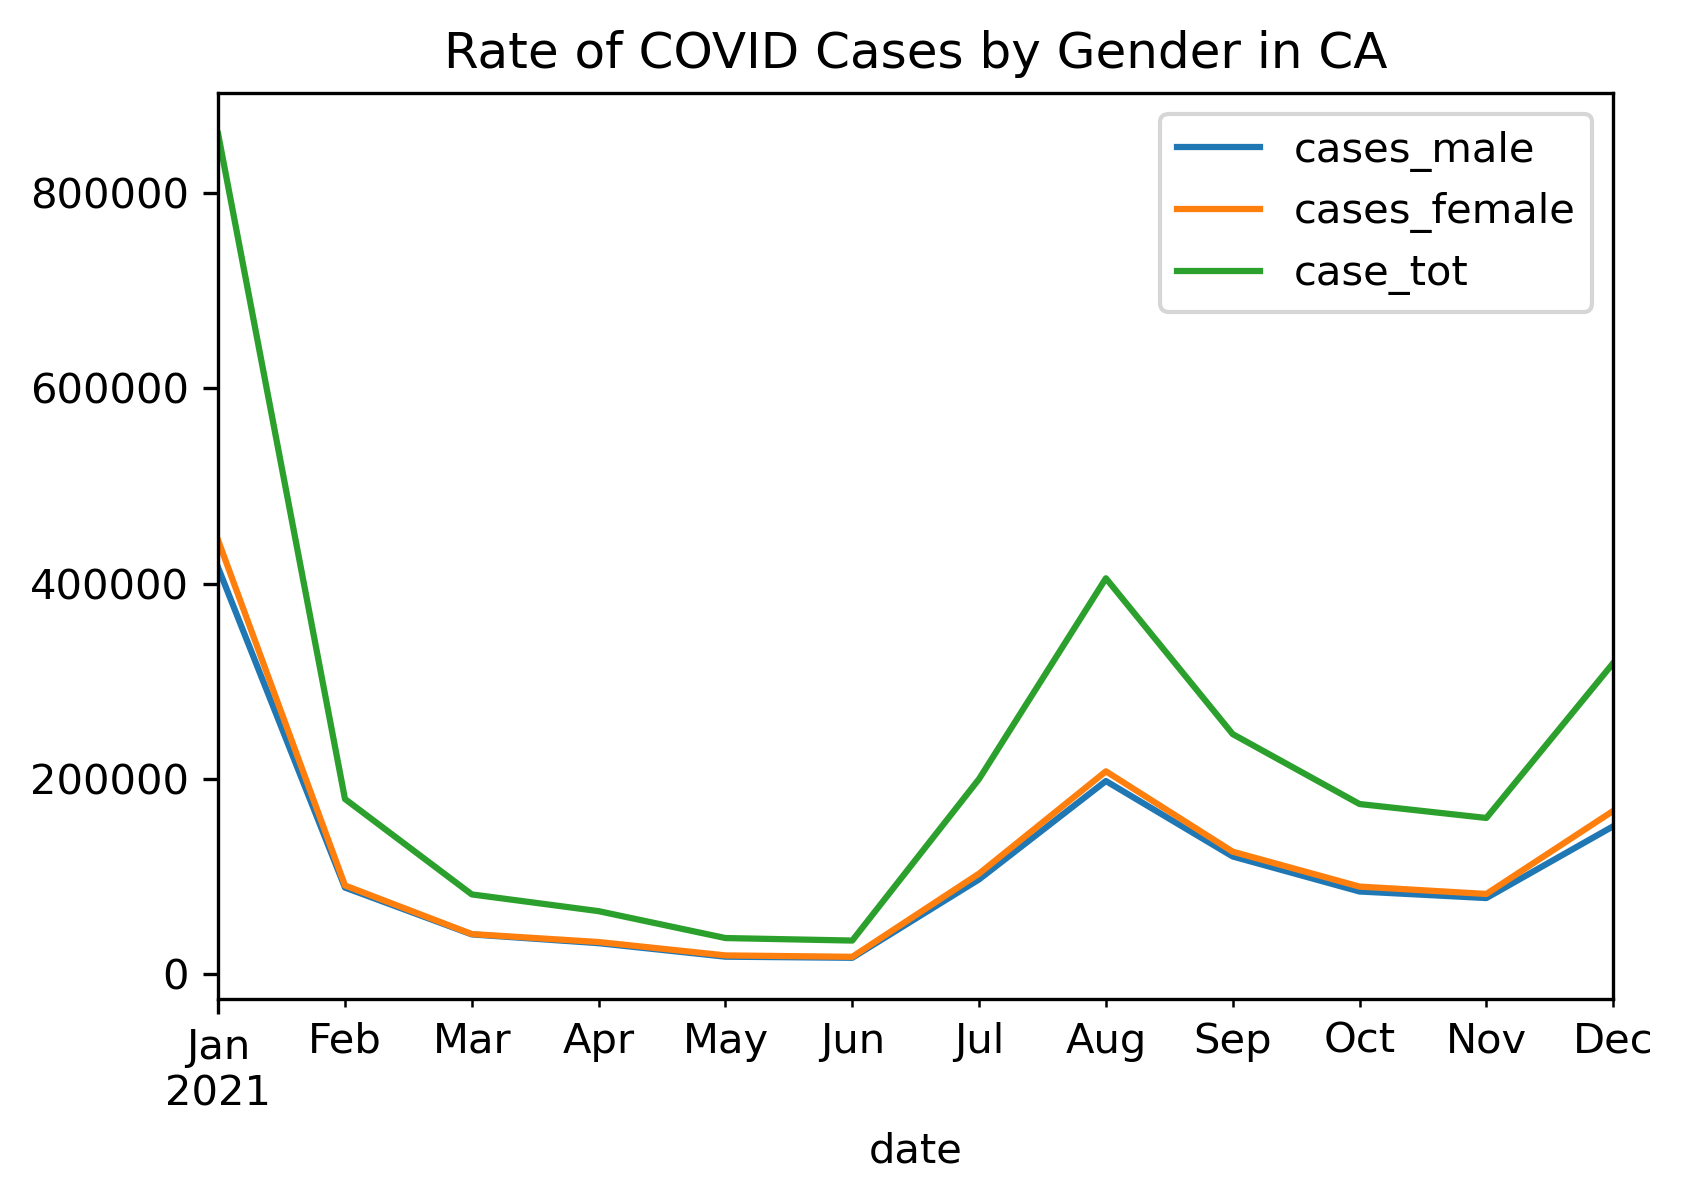

In [324]:
ca_covidgen.plot(x="date", y=["cases_male", "cases_female", "case_tot"], kind="line", title="Rate of COVID Cases by Gender in CA")



In [325]:
# LINEAR REGRESSIONS FOR CASES GENDER

caf_formula = "cases_female ~ admin_janssen_female + admin_moderna_female + admin_pfizer_female"
caf_model = sm.ols(formula=caf_formula, data = ca_covidgen)
caf_fitted = caf_model.fit()

print(caf_fitted.summary())


                            OLS Regression Results                            
Dep. Variable:           cases_female   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     5.691
Date:                Wed, 16 Mar 2022   Prob (F-statistic):             0.0271
Time:                        19:22:59   Log-Likelihood:                -129.49
No. Observations:                  11   AIC:                             267.0
Df Residuals:                       7   BIC:                             268.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             9.049e+04 

/Users/austinwahl/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [326]:
cam_formula = "cases_male ~ admin_janssen_male + admin_moderna_male + admin_pfizer_male"
cam_model = sm.ols(formula=cam_formula, data = ca_covidgen)
cam_fitted = cam_model.fit()

print(cam_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:             cases_male   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     7.661
Date:                Wed, 16 Mar 2022   Prob (F-statistic):             0.0129
Time:                        19:22:59   Log-Likelihood:                -127.56
No. Observations:                  11   AIC:                             263.1
Df Residuals:                       7   BIC:                             264.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           7.301e+04   2.37

/Users/austinwahl/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


**FL, IL, NY**

No data for gender administration over time, applying the most recent percentages from each state's health department website.

{"CA":1, "FL":2, "NY":3, "IL":4}

http://ww11.doh.state.fl.us/comm/_partners/covid19_report_archive/covid19-data/covid19_data_latest.pdf

https://dph.illinois.gov/covid19/vaccine/vaccine-data.html?county=Illinois#demographics

https://coronavirus.health.ny.gov/demographic-vaccination-data

Florida:

In [327]:
fl_vax = vax_df_diff[vax_df_diff["state"].isin([2])]

In [328]:
# fl_vax

In [329]:
fl_case = covid_df[covid_df["state"].isin(["FL"])]

fl_case = fl_case[~fl_case["sex"].isin(["Not Available"])]

fl_case = fl_case.groupby(["date", "sex"]).size().reset_index(name="cases")

In [330]:
# fl_case

In [331]:
fl_casegen = fl_case.pivot(index="date", columns="sex", values="cases").reset_index().rename_axis(None, axis=1).fillna(0)

In [332]:
fl_casegen["case_tot"] = fl_casegen["Female"] + fl_casegen["Male"]

fl_casegen = fl_casegen.rename(columns={"Female" : "cases_female", "Male" : "cases_male"})

In [333]:
# fl_casegen

In [334]:
# merge of cases and vax
fl_case_vax = pd.merge(fl_casegen, fl_vax, on=["date"], how="inner")

In [335]:
# need to shift the vax numbers as we did before
shiftcol = ["admin_janssen_diff", "admin_moderna_diff", "admin_pfizer_diff", "admin_unk_diff"]
fl_case_vax[shiftcol] = fl_case_vax[shiftcol].shift(1)

In [336]:
# fl_case_vax

In [337]:
# applying % vaccinated per gender group

fl_case_vax["admin_janssen_male"] = (fl_case_vax["admin_janssen_diff"] * 0.46547053).round()

fl_case_vax["admin_moderna_male"] = (fl_case_vax["admin_moderna_diff"] * 0.46547053).round()

fl_case_vax["admin_pfizer_male"] = (fl_case_vax["admin_pfizer_diff"] * 0.46547053).round()

# female cols
fl_case_vax["admin_janssen_female"] = (fl_case_vax["admin_janssen_diff"] * 0.53278872).round()

fl_case_vax["admin_moderna_female"] = (fl_case_vax["admin_moderna_diff"] * 0.53278872).round()

fl_case_vax["admin_pfizer_female"] = (fl_case_vax["admin_pfizer_diff"] * 0.53278872).round()



In [338]:
fl_case_vax

,date,cases_female,cases_male,case_tot,state,admin_janssen_diff,admin_moderna_diff,admin_pfizer_diff,admin_unk_diff,admin_janssen_male,admin_moderna_male,admin_pfizer_male,admin_janssen_female,admin_moderna_female,admin_pfizer_female
0,2021-01-01,109341.0,95975.0,205316.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01,85760.0,76786.0,162546.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-03-01,171793.0,154809.0,326602.0,2,0.0,867328.0,898940.0,1301.0,0.0,403716.0,418430.0,0.0,462103.0,478945.0
3,2021-04-01,57955.0,51480.0,109435.0,2,0.0,1537425.0,1501240.0,3917.0,0.0,715626.0,698783.0,0.0,819123.0,799844.0
4,2021-05-01,28271.0,24586.0,52857.0,2,242259.0,2104044.0,2379069.0,8407.0,112764.0,979370.0,1107387.0,129073.0,1121011.0,1267541.0
5,2021-06-01,25574.0,22576.0,48150.0,2,312882.0,2119002.0,3262918.0,11564.0,145637.0,986333.0,1518792.0,166700.0,1128980.0,1738446.0
6,2021-07-01,61034.0,51898.0,112932.0,2,261220.0,1198238.0,1862554.0,11180.0,121590.0,557744.0,866964.0,139175.0,638408.0,992348.0
7,2021-08-01,140509.0,122508.0,263017.0,2,195740.0,554288.0,1529461.0,12304.0,91111.0,258005.0,711919.0,104288.0,295318.0,814880.0
8,2021-09-01,147723.0,134000.0,281723.0,2,97267.0,360424.0,1038927.0,16986.0,45275.0,167767.0,483590.0,51823.0,192030.0,553529.0
9,2021-10-01,92991.0,85730.0,178721.0,2,60293.0,696581.0,1579815.0,14158.0,28065.0,324238.0,735357.0,32123.0,371130.0,841708.0


In [339]:
# LINEAR REGRESSIONS FOR CASES GENDER

flf_formula = "cases_female ~ admin_janssen_female + admin_moderna_female + admin_pfizer_female"
flf_model = sm.ols(formula=flf_formula, data =fl_case_vax)
flf_fitted = flf_model.fit()

print(flf_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:           cases_female   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                 -0.087
Method:                 Least Squares   F-statistic:                    0.7324
Date:                Wed, 16 Mar 2022   Prob (F-statistic):              0.565
Time:                        19:23:01   Log-Likelihood:                -133.88
No. Observations:                  11   AIC:                             275.8
Df Residuals:                       7   BIC:                             277.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.306e+05 

/Users/austinwahl/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [340]:
flm_formula = "cases_male ~ admin_janssen_male + admin_moderna_male + admin_pfizer_male"
flm_model = sm.ols(formula=flm_formula, data = fl_case_vax)
flm_fitted = flm_model.fit()

print(flm_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:             cases_male   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                 -0.090
Method:                 Least Squares   F-statistic:                    0.7255
Date:                Wed, 16 Mar 2022   Prob (F-statistic):              0.568
Time:                        19:23:01   Log-Likelihood:                -132.73
No. Observations:                  11   AIC:                             273.5
Df Residuals:                       7   BIC:                             275.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.165e+05   3.86

/Users/austinwahl/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


New York:

total vax = 15,773,390

In [341]:
ny_vax = vax_df_diff[vax_df_diff["state"].isin([3])]

In [342]:
# ny_vax

In [343]:
ny_case = covid_df[covid_df["state"].isin(["NY"])]

ny_case = ny_case[~ny_case["sex"].isin(["Not Available"])]

ny_case = ny_case.groupby(["date", "sex"]).size().reset_index(name="cases")

In [344]:
# ny_case

In [345]:
ny_casegen = ny_case.pivot(index="date", columns="sex", values="cases").reset_index().rename_axis(None, axis=1).fillna(0)



In [346]:
ny_casegen["case_tot"] = ny_casegen["Female"] + ny_casegen["Male"]

ny_casegen = ny_casegen.rename(columns={"Female" : "cases_female", "Male" : "cases_male"})

In [347]:
# ny_casegen

In [348]:
# merge of cases and vax
ny_case_vax = pd.merge(ny_casegen, ny_vax, on=["date"], how="inner")

In [349]:
# need to shift the vax numbers as we did before
shiftcol = ["admin_janssen_diff", "admin_moderna_diff", "admin_pfizer_diff", "admin_unk_diff"]
ny_case_vax[shiftcol] = ny_case_vax[shiftcol].shift(1)

In [350]:
# ny_case_vax

In [351]:
# applying % vaccinated per gender group

# male = 15,773,390 / 7,494,733 = 0.47515043
# female = 15,773,390 / 8,280,000 = 0.52493472

ny_case_vax["admin_janssen_male"] = (ny_case_vax["admin_janssen_diff"] * 0.47515043).round()

ny_case_vax["admin_moderna_male"] = (ny_case_vax["admin_moderna_diff"] * 0.47515043).round()

ny_case_vax["admin_pfizer_male"] = (ny_case_vax["admin_pfizer_diff"] * 0.47515043).round()

# female cols
ny_case_vax["admin_janssen_female"] = (ny_case_vax["admin_janssen_diff"] * 0.52493472).round()

ny_case_vax["admin_moderna_female"] = (ny_case_vax["admin_moderna_diff"] * 0.52493472).round()

ny_case_vax["admin_pfizer_female"] = (ny_case_vax["admin_pfizer_diff"] * 0.52493472).round()



In [352]:
ny_case_vax

,date,cases_female,cases_male,case_tot,state,admin_janssen_diff,admin_moderna_diff,admin_pfizer_diff,admin_unk_diff,admin_janssen_male,admin_moderna_male,admin_pfizer_male,admin_janssen_female,admin_moderna_female,admin_pfizer_female
0,2021-01-01,169532,158946,328478,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01,101883,94283,196166,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-03-01,113089,106568,219657,3,0.0,861108.0,837858.0,200.0,0.0,409156.0,398109.0,0.0,452025.0,439821.0
3,2021-04-01,74741,67019,141760,3,0.0,1310516.0,1117118.0,245.0,0.0,622692.0,530799.0,0.0,687935.0,586414.0
4,2021-05-01,21603,18541,40144,3,216370.0,2056040.0,2764718.0,812.0,102808.0,976928.0,1313657.0,113580.0,1079287.0,1451296.0
5,2021-06-01,6075,5126,11201,3,386725.0,2509322.0,3567394.0,1674.0,183753.0,1192305.0,1695049.0,203005.0,1317230.0,1872649.0
6,2021-07-01,23829,21418,45247,3,224941.0,1332360.0,2290258.0,1220.0,106881.0,633071.0,1088217.0,118079.0,699402.0,1202236.0
7,2021-08-01,66019,57074,123093,3,120755.0,591930.0,1430009.0,952.0,57377.0,281256.0,679469.0,63388.0,310725.0,750661.0
8,2021-09-01,71485,64076,135561,3,64769.0,296836.0,783841.0,1371.0,30775.0,141042.0,372442.0,33999.0,155820.0,411465.0
9,2021-10-01,60535,53952,114487,3,58745.0,316637.0,1054236.0,1424.0,27913.0,150450.0,500921.0,30837.0,166214.0,553405.0


In [353]:
# LINEAR REGRESSIONS FOR CASES GENDER

nyf_formula = "cases_female ~ admin_janssen_female + admin_moderna_female + admin_pfizer_female"
nyf_model = sm.ols(formula=nyf_formula, data =ny_case_vax)
nyf_fitted = nyf_model.fit()

print(nyf_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:           cases_female   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     1.997
Date:                Wed, 16 Mar 2022   Prob (F-statistic):              0.203
Time:                        19:23:04   Log-Likelihood:                -135.16
No. Observations:                  11   AIC:                             278.3
Df Residuals:                       7   BIC:                             279.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             6.851e+04 

/Users/austinwahl/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [354]:
nym_formula = "cases_male ~ admin_janssen_male + admin_moderna_male + admin_pfizer_male"
nym_model = sm.ols(formula=nym_formula, data = ny_case_vax)
nym_fitted = nym_model.fit()

print(nym_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:             cases_male   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     2.014
Date:                Wed, 16 Mar 2022   Prob (F-statistic):              0.201
Time:                        19:23:04   Log-Likelihood:                -133.87
No. Observations:                  11   AIC:                             275.7
Df Residuals:                       7   BIC:                             277.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           6.462e+04   4.78

/Users/austinwahl/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Illinois:

total vax = 8,979,541

In [355]:
il_vax = vax_df_diff[vax_df_diff["state"].isin([4])]

In [356]:
# il_vax

In [357]:
il_case = covid_df[covid_df["state"].isin(["IL"])]

il_case = il_case[~il_case["sex"].isin(["Not Available"])]

il_case = il_case.groupby(["date", "sex"]).size().reset_index(name="cases")

In [358]:
# il_case

#Cases for IL aren't reported until 2020-02-01

In [359]:
il_casegen = il_case.pivot(index="date", columns="sex", values="cases").reset_index().rename_axis(None, axis=1).fillna(0)



In [360]:
il_casegen["case_tot"] = il_casegen["Female"] + il_casegen["Male"]

il_casegen = il_casegen.rename(columns={"Female" : "cases_female", "Male" : "cases_male"})


In [361]:
# il_casegen

In [362]:
# merge of cases and vax
il_case_vax = pd.merge(il_casegen, il_vax, on=["date"], how="inner")

In [363]:
# need to shift the vax numbers as we did before
shiftcol = ["admin_janssen_diff", "admin_moderna_diff", "admin_pfizer_diff", "admin_unk_diff"]
il_case_vax[shiftcol] = il_case_vax[shiftcol].shift(1)


In [364]:
# il_case_vax

In [365]:
# applying % vaccinated per gender group

# male = 8,979,541 / 4,233,233 = 0.47143089
# female = 8,979,541 / 4,746,308 = 0.52856911

il_case_vax["admin_janssen_male"] = (il_case_vax["admin_janssen_diff"] * 0.47143089).round()

il_case_vax["admin_moderna_male"] = (il_case_vax["admin_moderna_diff"] * 0.47143089).round()

il_case_vax["admin_pfizer_male"] = (il_case_vax["admin_pfizer_diff"] * 0.47143089).round()

# female cols
il_case_vax["admin_janssen_female"] = (il_case_vax["admin_janssen_diff"] * 0.52856911).round()

il_case_vax["admin_moderna_female"] = (il_case_vax["admin_moderna_diff"] * 0.52856911).round()

il_case_vax["admin_pfizer_female"] = (il_case_vax["admin_pfizer_diff"] * 0.52856911).round()



In [366]:
il_case_vax

,date,cases_female,cases_male,case_tot,state,admin_janssen_diff,admin_moderna_diff,admin_pfizer_diff,admin_unk_diff,admin_janssen_male,admin_moderna_male,admin_pfizer_male,admin_janssen_female,admin_moderna_female,admin_pfizer_female
0,2021-01-01,63832.0,60405.0,124237.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01,23768.0,24440.0,48208.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-03-01,34430.0,33716.0,68146.0,4,0.0,415968.0,474188.0,185.0,0.0,196100.0,223547.0,0.0,219868.0,250641.0
3,2021-04-01,41537.0,37706.0,79243.0,4,0.0,958915.0,892001.0,825.0,0.0,452062.0,420517.0,0.0,506853.0,471484.0
4,2021-05-01,16094.0,14105.0,30199.0,4,128349.0,1410282.0,1626525.0,1708.0,60508.0,664850.0,766794.0,67841.0,745432.0,859731.0
5,2021-06-01,4271.0,3574.0,7845.0,4,183659.0,1257608.0,2034106.0,2477.0,86583.0,592875.0,958940.0,97076.0,664733.0,1075166.0
6,2021-07-01,25064.0,22142.0,47206.0,4,82759.0,704081.0,1360702.0,2658.0,39015.0,331926.0,641477.0,43744.0,372155.0,719225.0
7,2021-08-01,57919.0,53124.0,111043.0,4,61836.0,341640.0,894424.0,2663.0,29151.0,161060.0,421659.0,32685.0,180580.0,472765.0
8,2021-09-01,46118.0,41180.0,87298.0,4,32683.0,145697.0,498166.0,4297.0,15408.0,68686.0,234851.0,17275.0,77011.0,263315.0
9,2021-10-01,37788.0,34344.0,72132.0,4,41461.0,169286.0,771568.0,2584.0,19546.0,79807.0,363741.0,21915.0,89479.0,407827.0


In [367]:
# LINEAR REGRESSIONS FOR CASES GENDER

ilf_formula = "cases_female ~ admin_janssen_female + admin_moderna_female + admin_pfizer_female"
ilf_model = sm.ols(formula=ilf_formula, data =il_case_vax)
ilf_fitted = ilf_model.fit()

print(ilf_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:           cases_female   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     1.179
Date:                Wed, 16 Mar 2022   Prob (F-statistic):              0.384
Time:                        19:23:06   Log-Likelihood:                -132.91
No. Observations:                  11   AIC:                             273.8
Df Residuals:                       7   BIC:                             275.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3.339e+04 

/Users/austinwahl/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [368]:
ilm_formula = "cases_male ~ admin_janssen_male + admin_moderna_male + admin_pfizer_male"
ilm_model = sm.ols(formula=ilm_formula, data = il_case_vax)
ilm_fitted = ilm_model.fit()

print(ilm_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:             cases_male   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1.301
Date:                Wed, 16 Mar 2022   Prob (F-statistic):              0.347
Time:                        19:23:06   Log-Likelihood:                -130.76
No. Observations:                  11   AIC:                             269.5
Df Residuals:                       7   BIC:                             271.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3.344e+04   3.52

/Users/austinwahl/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [369]:
# merging 4 states back together

In [374]:
ca_covidgen = ca_covidgen.set_index("date")
fl_case_vax = fl_case_vax.set_index("date")
ny_case_vax = ny_case_vax.set_index("date")
il_case_vax = il_case_vax.set_index("date")

In [375]:
ca_covidgen

,cases_female,cases_male,case_tot,state,admin_janssen_diff,admin_moderna_diff,admin_pfizer_diff,admin_unk_diff,pfizer_malepct,moderna_malepct,jj_malepct,pfizer_femalepct,moderna_femalepct,jj_femalepct,admin_janssen_male,admin_moderna_male,admin_pfizer_male,admin_janssen_female,admin_moderna_female,admin_pfizer_female
date,,,,,,,,,,,,,,,,,,,,
2021-01-01,444099,416152,860251,1,NaN,NaN,NaN,NaN,0.430412,0.435735,0.560284,0.569588,0.564265,0.439716,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-01,90725,88556,179281,1,0.0,0.0,0.0,0.0,0.401580,0.436636,0.539130,0.598420,0.563364,0.460870,0.0,0.0,0.0,0.0,0.0,0.0
2021-03-01,40960,40596,81556,1,0.0,1539751.0,1539036.0,0.0,0.435514,0.438605,0.484914,0.564486,0.561395,0.515086,0.0,675342.0,670271.0,0.0,864409.0,868765.0
2021-04-01,32799,31611,64410,1,352.0,2859867.0,2792564.0,10.0,0.479150,0.473237,0.516532,0.520850,0.526763,0.483468,182.0,1353396.0,1338058.0,170.0,1506471.0,1454506.0
2021-05-01,19084,17779,36863,1,370149.0,4269462.0,4856850.0,1626.0,0.501734,0.508539,0.622582,0.498266,0.491461,0.377418,230448.0,2171187.0,2436846.0,139701.0,2098275.0,2420004.0
2021-06-01,17639,16652,34291,1,731072.0,4850227.0,6633513.0,1859.0,0.493341,0.517333,0.655199,0.506659,0.482667,0.344801,478998.0,2509180.0,3272583.0,252074.0,2341047.0,3360930.0
2021-07-01,102884,96959,199843,1,255978.0,2625843.0,4768392.0,1681.0,0.478236,0.508738,0.631365,0.521764,0.491262,0.368635,161616.0,1335867.0,2280415.0,94362.0,1289976.0,2487977.0
2021-08-01,207631,197718,405349,1,198595.0,1147495.0,2951158.0,1708.0,0.509855,0.550691,0.616745,0.490145,0.449309,0.383255,122483.0,631915.0,1504662.0,76112.0,515580.0,1446496.0
2021-09-01,125332,120407,245739,1,115222.0,680467.0,1705282.0,1791.0,0.479664,0.507829,0.612239,0.520336,0.492171,0.387761,70543.0,345561.0,817963.0,44679.0,334906.0,887319.0
